## **E-Commerce Customer Segmentation & Prediction**
### **Project Overview**

##### The primary goal of this project is to enhance customer understanding, marketing strategies, and retention efforts for an e-commerce business by leveraging advanced data analytics and machine learning techniques. Specifically, the project aims to:

##### *Segment customers based on their purchasing patterns using unsupervised clustering.*

##### *Predict a customer’s segment membership using a supervised predictive model.*

##### *Generate actionable business insights to optimize marketing, inventory, and customer engagement strategies.*

##### *By achieving these objectives, the company can tailor offerings, identify high-value customers, reduce churn, and maximize revenue potential.*

### **Business Problem**

##### E-commerce companies often struggle to understand the diversity of their customer base. Challenges include:

##### *Difficulty in identifying high-value customers and loyal buyers.*
##### *Inefficient marketing spend due to untargeted campaigns.*
##### *Lack of insight into cancellation patterns and customer behavior shifts.*
##### *Inability to predict which segment a new or existing customer belongs to.*

##### These challenges reduce operational efficiency, limit customer retention, and negatively impact revenue growth.

##### **Solution:** Using data-driven customer segmentation and predictive modeling, businesses can classify customers, identify behavioral patterns, and make informed decisions.

### **Data Description**

##### The dataset consists of transaction-level e-commerce data with the following fields:
| Column      | Description                                            |
| ----------- | ------------------------------------------------------ |
| InvoiceNo   | Invoice identifier (prefix `C` indicates cancellation) |
| StockCode   | Product identifier                                     |
| Description | Product description                                    |
| Quantity    | Units purchased                                        |
| InvoiceDate | Date & time of purchase                                |
| UnitPrice   | Price per unit                                         |
| CustomerID  | Unique customer ID                                     |
| Country     | Customer country                                       |

#### **Key statistics:**

##### 541,909 transaction records.
##### Missing CustomerID in some rows (~25%) — dropped during preprocessing.
##### Includes cancelled orders, which are handled separately for accurate modeling.

### **Methodology**

#### The project is divided into three major steps:

#### **A. Customer Segmentation (Unsupervised Learning)**
##### Feature Engineering: Compute RFM metrics:
##### Recency: Days since last purchase.
##### Frequency: Number of orders.
##### Monetary: Total spend.
##### Additional features:
##### Average Order Value, Product Diversity, Total Quantity, Cancel Rate.
##### Clustering Algorithms:
##### K-Means: Simple, scalable clustering.
##### Gaussian Mixture Models (GMM): Probabilistic clustering for overlapping segments.
##### Dimensionality Reduction: PCA/t-SNE for visualization.
##### Outcome: Each customer is assigned to a cluster that represents a behavioral segment.

#### **B. Predictive Classifier (Supervised Learning)**
##### Objective: Predict segment membership for new or existing customers.
##### Algorithms:
##### Logistic Regression (baseline)
##### Random Forest and XGBoost (advanced models)
##### Features:
##### RFM + advanced metrics (CancelRate, AvgOrderValue, Product Diversity)
##### Evaluation: Accuracy, classification report, confusion matrix, and feature importance.

#### **C. Business Insights**
##### Segment Profiling: Identify VIPs, loyal customers, at-risk customers, and bargain hunters
##### Actionable Recommendations: Marketing campaigns, loyalty programs, inventory planning, and customer retention strategies.
##### Monitoring: Track segment drift, cancellation patterns, and new customer predictions.

### **Expected Deliverables**

##### Customer Segmentation Model: Clusters representing customer segments.
##### Predictive Classifier: Model that predicts the segment for a customer.
##### Business Insights: Actionable recommendations and segment profiles.
##### Visualizations:
##### RFM distributions, segment scatter plots, correlation heatmaps, feature importance plots.
##### Deployment-ready Models: Saved .pkl files for real-time usage.
##### Documentation: Detailed notebook and report summarizing methodology, results, and recommendations.

### **Project Benefits**

##### Targeted Marketing: Identify high-value customers and optimize marketing campaigns.
##### Customer Retention: Detect at-risk customers and implement re-engagement strategies.
##### Revenue Growth: Focus on segments with the highest potential.
##### Operational Efficiency: Optimize inventory and product recommendations based on segment behavior.
##### Data-Driven Decision Making: Segment customers and predict behavior for strategic planning.

### **Advanced Features and Techniques**

##### Cancel Rate Metrics: Measure customer dissatisfaction and impact on loyalty.
##### Purchase Behavior Metrics: Avg. order value, product diversity, purchase interval, total quantity.
##### Probabilistic Clustering: GMM for overlapping segments.
##### Tree-based Predictive Models: XGBoost for high accuracy and feature importance insights.
##### Visualization Techniques: PCA, t-SNE, scatterplots, heatmaps for segment understanding.

#### **Step 1. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

# For clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# For classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

# For model evaluation
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Global random state for reproducibility
RANDOM_STATE = 42

# To save and load models
import joblib

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

#### **Step 2. Load the Dataset**

In [2]:
df = pd.read_csv('ecommerce_customer_segmentation_dataset.csv', encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### **Step 3. Data Inspection**

In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.describe(include = 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


#### **Initial Observations**

##### Missing values present in CustomerID
##### Negative and zero values in Quantity and UnitPrice
##### Data is transactional and requires aggregation

### **Step 4. Data Cleaning**

#### **Missing Values**

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
(df.isnull().sum() / len(df)) * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [9]:
# CustomerID is essential for customer-level analysis.
# Rows with missing CustomerID cannot be used for segmentation or prediction, therefore they are removed.
df = df.dropna(subset=["CustomerID"])

In [10]:
# Fill missing product descriptions
df['Description'] = df['Description'].fillna('Unknown')

#### **Duplicate Records**

In [11]:
# Duplicate rows may occur due to repeated data ingestion or logging errors.
# Removing duplicates prevents bias in customer purchase frequency and monetary calculations.
df = df.drop_duplicates()

#### **Datetime Conversion**

In [12]:
# Convert the 'InvoiceDate' column to datetime format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["InvoiceDate"].isna().sum()

np.int64(0)

#### **Handle Cancellations**

In [13]:
# Exclude cancelled orders from RFM (InvoiceNo starting with 'C')
df_clean = df[~df["InvoiceNo"].astype(str).str.startswith("C")]

# Add Cancelled Orders feature for predictive modeling
df["IsCancelled"] = df["InvoiceNo"].astype(str).str.startswith("C").astype(int)
cancel_rate = df.groupby("CustomerID")["IsCancelled"].mean().reset_index()
cancel_rate.columns = ["CustomerID", "Cancel_Rate"]

In [14]:
df_clean.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [15]:
df_clean.shape

(392732, 8)

In [16]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'IsCancelled'],
      dtype='object')

In [17]:
cancel_rate.head()

,CustomerID,Cancel_Rate
0,12346.0,0.5
1,12347.0,0.0
2,12348.0,0.0
3,12349.0,0.0
4,12350.0,0.0


##### *Cancelled orders are excluded from RFM calculations to ensure accurate metrics. Cancellation Rate per customer is added as a feature for predictive modeling to capture their propensity to cancel orders.*

#### **Remove Invalid Transactions**

In [18]:
# Transactions with non-positive price or quantity are invalid for revenue analysis
# and are removed to ensure accurate monetary calculations.
df = df[(df["UnitPrice"] > 0) & (df["Quantity"] > 0)]
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']

### **Step 5. Exploratory Data Analysis (EDA)**

#### **Data Distribution Analysis**

##### **Distribution Analysis of Numerical Variables**

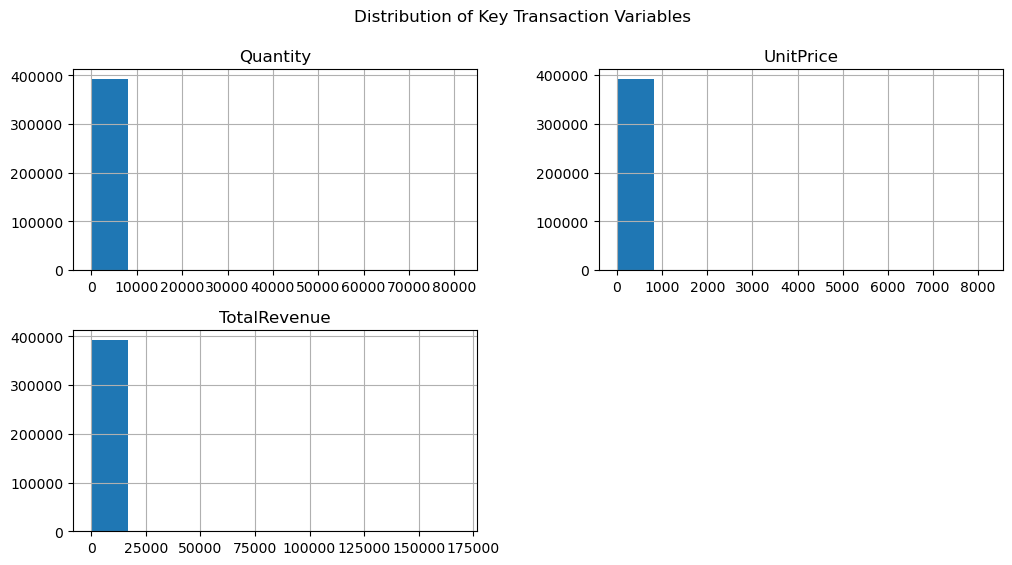

In [19]:
df[['Quantity', 'UnitPrice', 'TotalRevenue']].hist(figsize=(12,6))
plt.suptitle('Distribution of Key Transaction Variables')
plt.show()

##### **Transaction-Level Revenue Distribution**

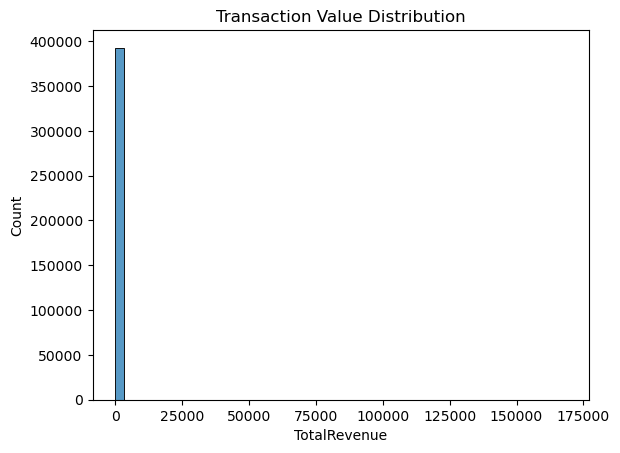

In [20]:
sns.histplot(df["TotalRevenue"], bins=50)
plt.title("Transaction Value Distribution")
plt.show()

##### **Log-Transformed Revenue Distribution**

##### *"Log transformation was applied to transaction revenue to reduce skewness, limit the influence of extreme values, and improve the stability and interpretability of customer segmentation and predictive models.”*

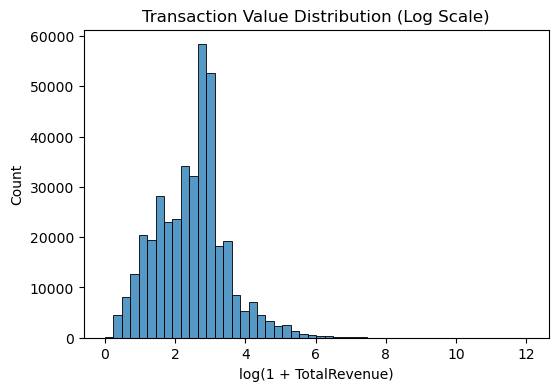

In [21]:
# LogTotalRevenue is used only for EDA and visualization.
# Monetary value for RFM will use aggregated TotalRevenue at customer level.

df['LogTotalRevenue'] = np.log1p(df['TotalRevenue'])

plt.figure(figsize=(6,4))
sns.histplot(df['LogTotalRevenue'], bins=50)
plt.title("Transaction Value Distribution (Log Scale)")
plt.xlabel("log(1 + TotalRevenue)")
plt.show()

#### **Customer Behavior Analysis**

##### **Customer-Level Revenue Distribution**

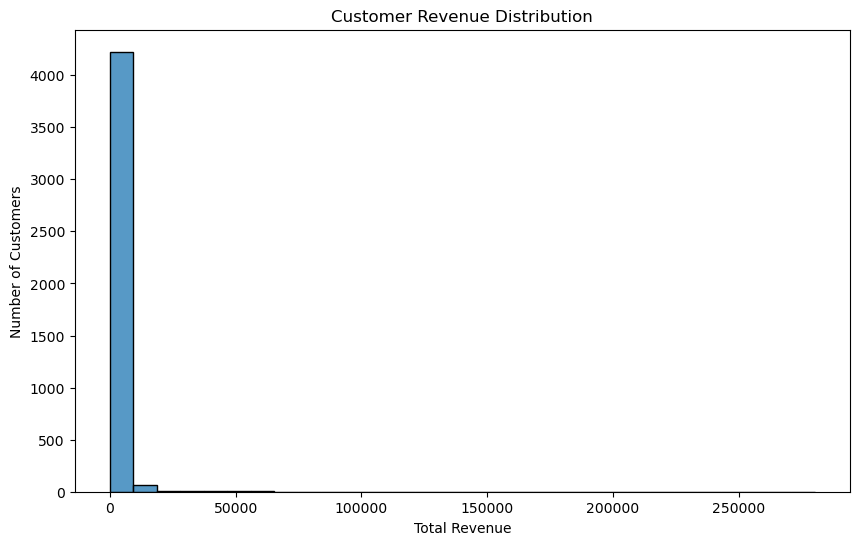

In [22]:
#total revenue per customer
customer_revenue = df.groupby('CustomerID')['TotalRevenue'].sum()

# Visualize customer revenue distribution
plt.figure(figsize=(10, 6))
sns.histplot(customer_revenue, bins=30)
plt.title('Customer Revenue Distribution')
plt.xlabel('Total Revenue')
plt.ylabel('Number of Customers')
plt.show()

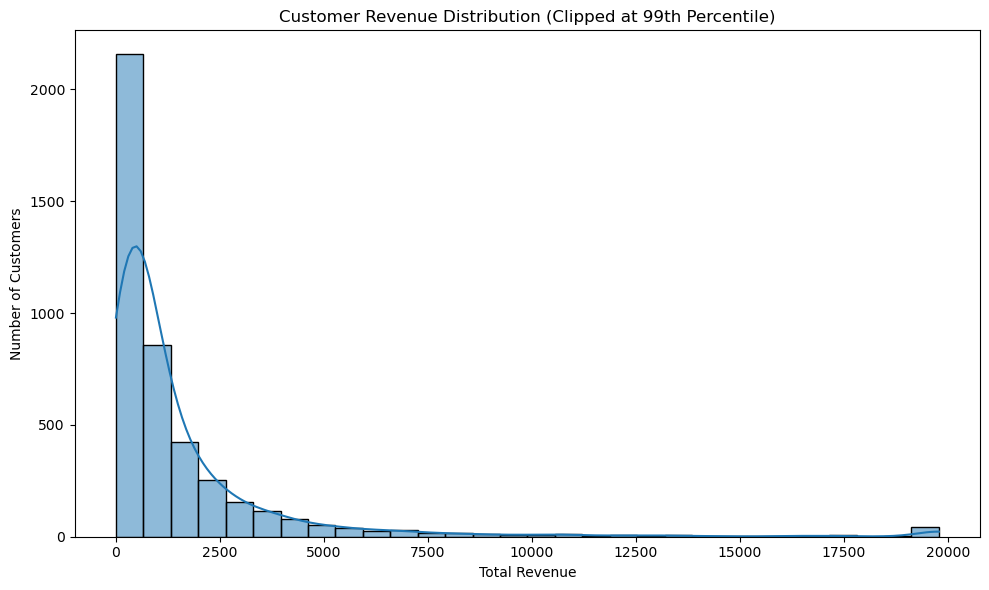

In [23]:
# Clip extreme values to reduce scale (focus on 99th percentile)
customer_revenue_clipped = customer_revenue.clip(upper=customer_revenue.quantile(0.99))

# Visualize customer revenue distribution
plt.figure(figsize=(10, 6))
sns.histplot(customer_revenue_clipped, bins=30, kde=True)
plt.title('Customer Revenue Distribution (Clipped at 99th Percentile)')
plt.xlabel('Total Revenue')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

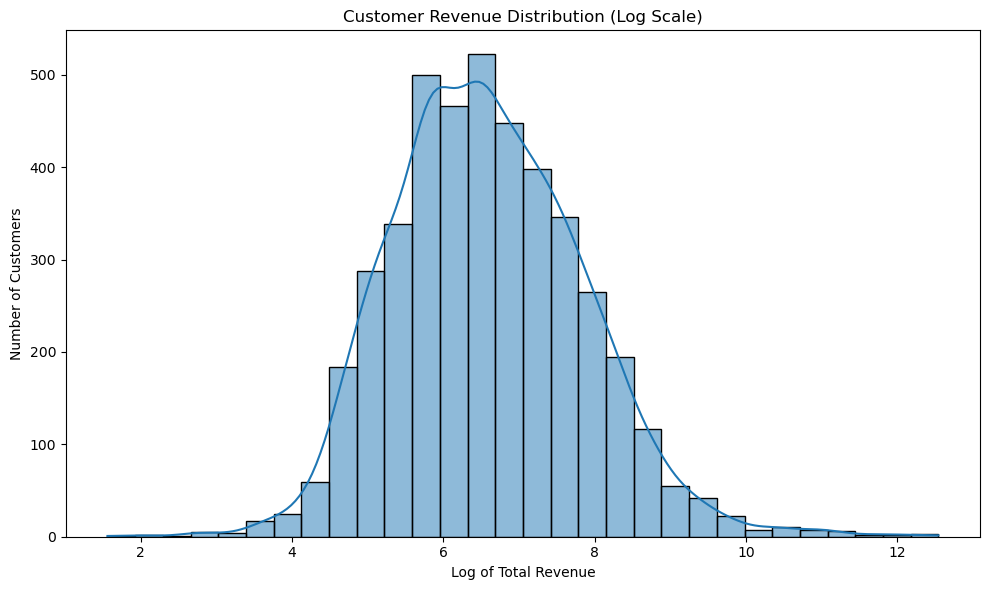

In [24]:
# Log-transform to reduce scale/skewness
customer_revenue_log = np.log1p(customer_revenue)

# Visualize customer revenue distribution
plt.figure(figsize=(10, 6))
sns.histplot(customer_revenue_log, bins=30, kde=True)
plt.title('Customer Revenue Distribution (Log Scale)')
plt.xlabel('Log of Total Revenue')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

##### *“Most customers have low revenue, with a few high-value customers dominating total revenue — indicating a skewed distribution common in e-commerce.”*

##### **Customer Purchase Frequency Analysis**

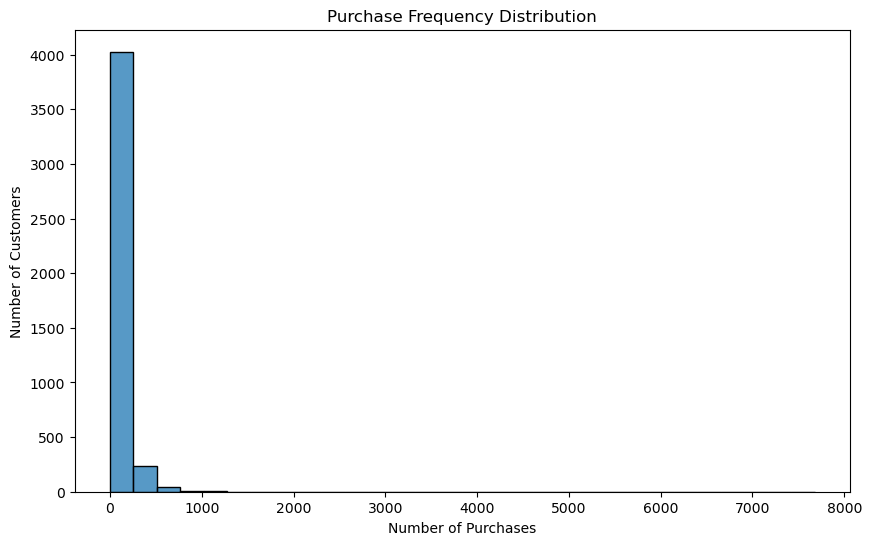

In [25]:
#purchase frequency per customer
purchase_frequency = df.groupby('CustomerID')['InvoiceNo'].count()

# Visualize purchase frequency distribution
plt.figure(figsize=(10, 6))
sns.histplot(purchase_frequency, bins=30)
plt.title('Purchase Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

##### **Order Frequency per Customer**

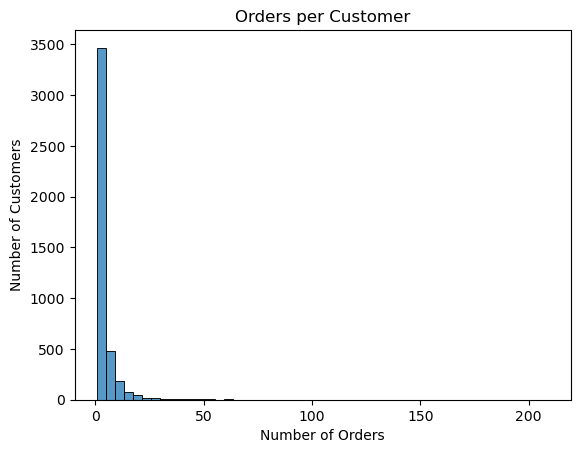

In [26]:
orders_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique()

plt.figure()
sns.histplot(orders_per_customer, bins=50)
plt.title("Orders per Customer")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Customers")
plt.show()

##### **Top Revenue-Contributing Customers**

In [27]:
df.groupby('CustomerID')['TotalRevenue'].sum().sort_values(ascending=False).head(10)

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
14911.0    143711.17
12415.0    124914.53
14156.0    117210.08
17511.0     91062.38
16029.0     80850.84
12346.0     77183.60
Name: TotalRevenue, dtype: float64

#### **Product Performance Analysis**

##### **Top Revenue-Generating Products**

In [28]:
df.groupby('Description')['TotalRevenue'].sum().sort_values(ascending=False).head(10)

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 53419.93
RABBIT NIGHT LIGHT                     51251.24
Name: TotalRevenue, dtype: float64

##### **Top-Selling Products by Quantity**

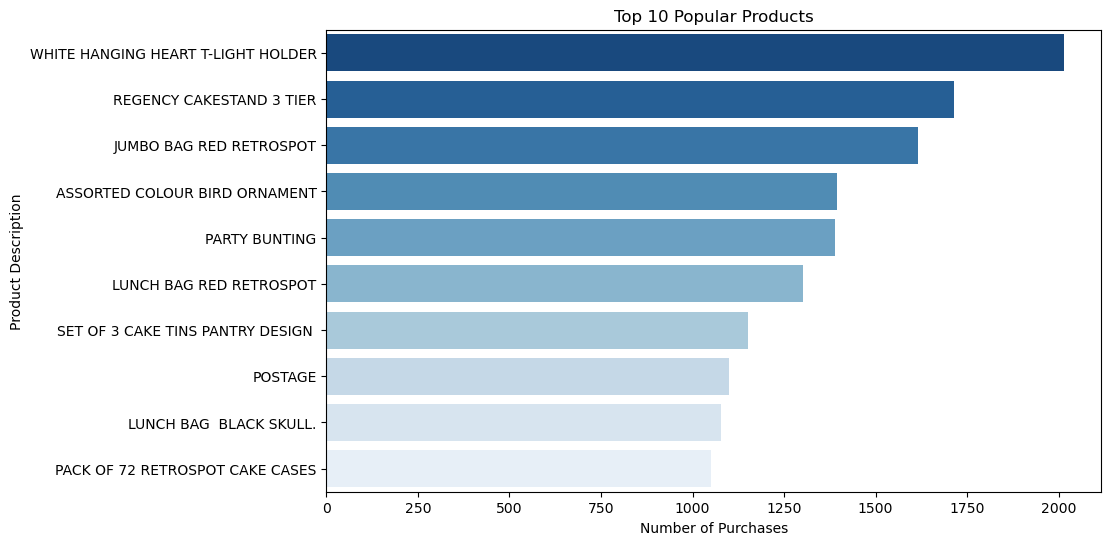

In [29]:
# Analyze product popularity
product_popularity = df['Description'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=product_popularity.values, y=product_popularity.index, palette="Blues_r")
plt.title('Top 10 Popular Products')
plt.xlabel('Number of Purchases')
plt.ylabel('Product Description')
plt.show()

##### **Most Frequently Purchased Products**

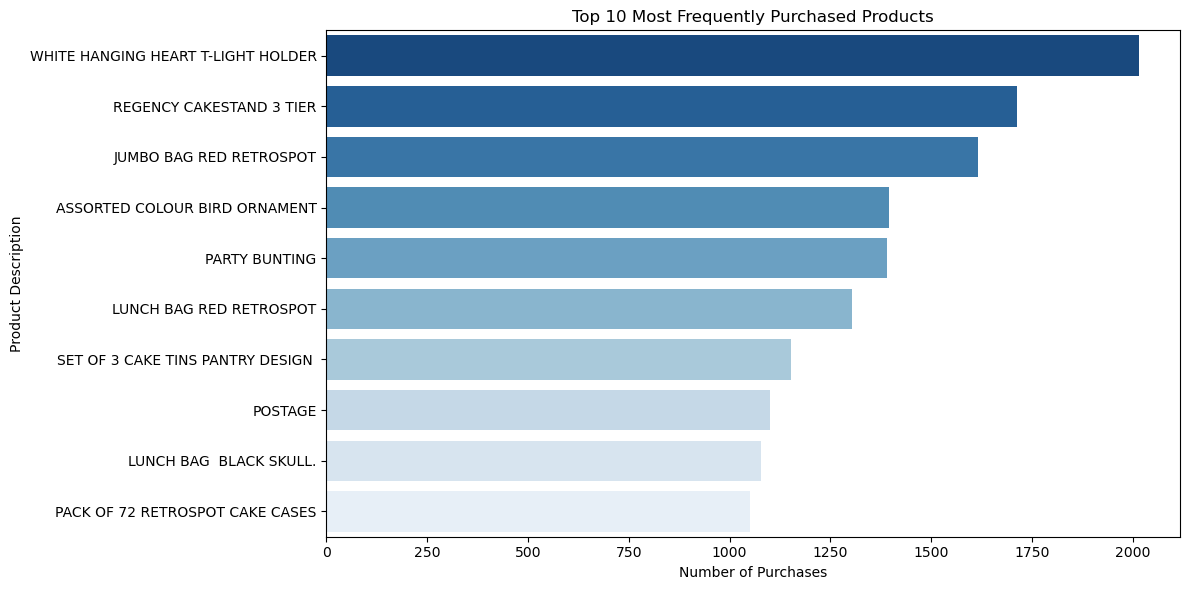

In [30]:
top_products = df['Description'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="Blues_r")
plt.title('Top 10 Most Frequently Purchased Products')
plt.xlabel('Number of Purchases')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

#### **Time-Based Sales Analysis**

##### **Monthly Transaction Volume Trend**

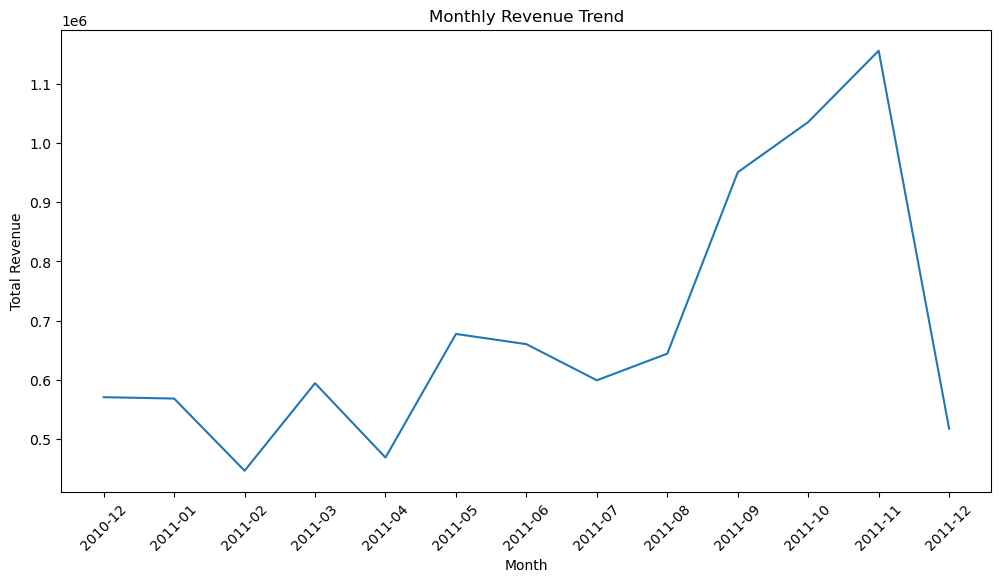

In [31]:
# purchase patterns over time
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_revenue = df.groupby('InvoiceMonth')['TotalRevenue'].sum()

# Visualize monthly revenue trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index.astype(str), monthly_revenue.values)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

##### **Monthly Revenue Seasonality Analysis**

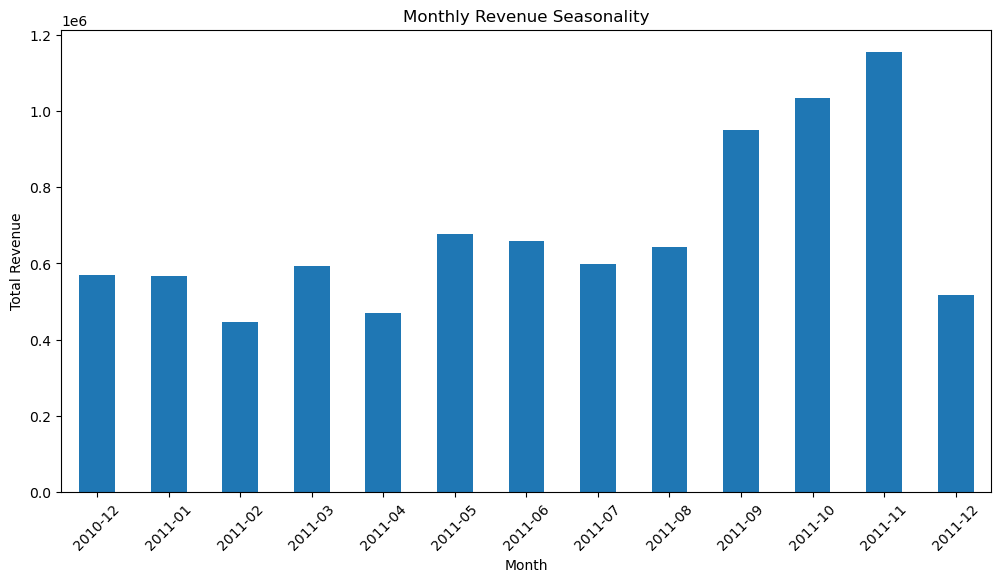

In [32]:
# Analyze sales seasonality using monthly revenue data
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='bar')
plt.title('Monthly Revenue Seasonality')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

##### **Month-over-Month Revenue Growth**

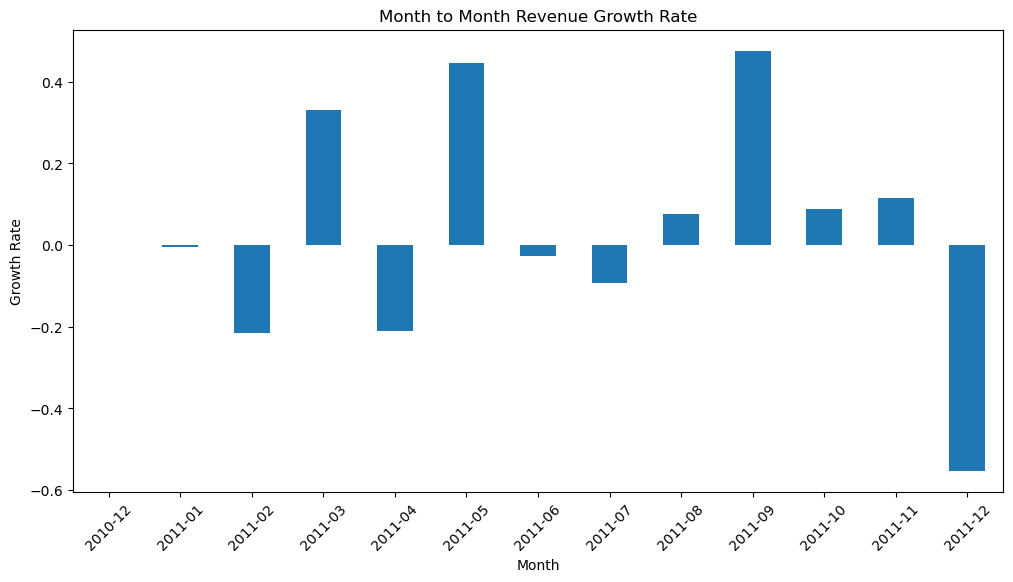

In [33]:
# Calculate and visualize the month-over-month revenue growth rate
monthly_revenue_growth = monthly_revenue.pct_change()
plt.figure(figsize=(12, 6))
monthly_revenue_growth.plot(kind='bar')
plt.title('Month to Month Revenue Growth Rate')
plt.xlabel('Month')
plt.ylabel('Growth Rate')
plt.xticks(rotation=45)
plt.show()

#### **Geographical Analysis**

##### **Geographical Distribution of Customers**

In [34]:
df["Country"].value_counts().head(10)

Country
United Kingdom    349203
Germany             9025
France              8326
EIRE                7226
Spain               2479
Netherlands         2359
Belgium             2031
Switzerland         1841
Portugal            1453
Australia           1181
Name: count, dtype: int64

### **Step 6. Outlier Detection (IQR Method)**

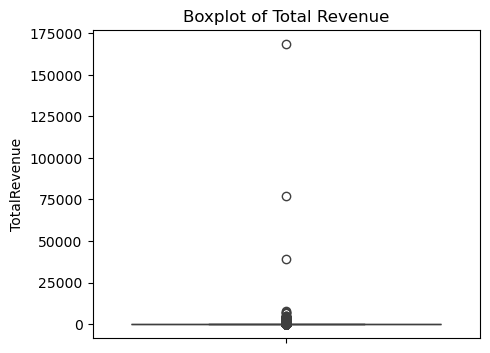

In [35]:
plt.figure(figsize=(5, 4))  # small size
sns.boxplot(y=df['TotalRevenue'])
plt.title('Boxplot of Total Revenue')
plt.show()

In [36]:
Q1 = df["TotalRevenue"].quantile(0.25)
Q3 = df["TotalRevenue"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["TotalRevenue"] < Q1 - 1.5*IQR) | 
              (df["TotalRevenue"] > Q3 + 1.5*IQR)]
outliers.count()

InvoiceNo          31231
StockCode          31231
Description        31231
Quantity           31231
InvoiceDate        31231
UnitPrice          31231
CustomerID         31231
Country            31231
IsCancelled        31231
TotalRevenue       31231
LogTotalRevenue    31231
InvoiceMonth       31231
dtype: int64

#### **Business Decision**

##### Outliers are retained
##### Later isolated as special high-value segments

### **Step 7. Feature Engineering**

In [37]:
# Creating new feature Total Revenue to analyze customer value and transaction-level performance 
df_clean['TotalRevenue'] = df_clean['Quantity'] * df_clean['UnitPrice']

##### **RFM Analysis: Recency, Frequency, and Monetary**

##### RFM (Recency, Frequency, and Monetary) analysis is a widely used method for customer segmentation, which helps businesses understand customer behavior based on three key dimensions:

##### **Recency (R)**: How recently a customer made a purchase.
##### **Frequency (F)**: How often a customer makes a purchase over a given time period.
##### **Monetary (M)**: How much money a customer spends during a given period.

##### By analyzing these three metrics, businesses can group customers into different segments for targeted marketing, customer retention strategies, or personalized offers.

#### **Define Reference Date**

In [38]:
# Convert InvoiceDate to datetime
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

reference_date = df_clean["InvoiceDate"].max() + pd.Timedelta(days=1)
reference_date

Timestamp('2011-12-10 12:50:00')

#### **Create RFM Table**

In [39]:
rfm = df_clean.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (reference_date - x.max()).days,
    "InvoiceNo": "nunique",
    "TotalRevenue": "sum"
})

rfm.columns = ["Recency", "Frequency", "Monetary"]
rfm.reset_index(inplace=True)
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [40]:
rfm.shape

(4339, 4)

#### **Customer-Level Aggregation Features**

##### In this section, we perform aggregation at the customer level to compute essential features such as:

##### - **First Purchase**: The first transaction made by the customer.
##### - **Last Purchase**: The most recent transaction made by the customer.
##### - **Recency**: days since last purchase
##### - **Frequency**: The number of unique invoices (purchases) the customer has made.
##### - **Monetary**: The total revenue generated by the customer.
##### - **Total Quantity**: The total quantity of items purchased by the customer.
##### - **Average Quantity**: The average quantity of items per purchase.
##### - **Product Diversity**: The number of unique products purchased by the customer.
##### - **Top Product**: The most frequently purchased product by the customer.
##### - **Average Order Value**: Monetary/Frequency
##### - **Cancel Rate** is the percentage of canceled orders relative to the total number of orders placed by a customer

In [41]:
customer_df = (
    df_clean.groupby('CustomerID').agg(
        FirstPurchase=('InvoiceDate', 'min'),
        LastPurchase=('InvoiceDate', 'max'),
        TotalQuantity=('Quantity', 'sum'),
        AverageQuantity=('Quantity', 'mean'),
        ProductDiversity=('Description', 'nunique'),
        TopProduct=('Description', lambda x: x.mode()[0])
    )
)

# Merge the RFM table
customer_df = customer_df.merge(rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary']], 
                                 on='CustomerID', how='left')
# Optionally, add other new features
customer_df['AverageOrderValue'] = customer_df['Monetary'] / customer_df['Frequency']

# Merge the cancel rate
customer_df = customer_df.merge(cancel_rate[['CustomerID', 'Cancel_Rate']], 
                on='CustomerID', 
                how='left')

customer_df.head()

,CustomerID,FirstPurchase,LastPurchase,TotalQuantity,AverageQuantity,ProductDiversity,TopProduct,Recency,Frequency,Monetary,AverageOrderValue,Cancel_Rate
0,12346.0,2011-01-18 10:01:00,2011-01-18 10:01:00,74215,74215.000000,1,MEDIUM CERAMIC TOP STORAGE JAR,326,1,77183.60,77183.600000,0.5
1,12347.0,2010-12-07 14:57:00,2011-12-07 15:52:00,2458,13.505495,103,AIRLINE BAG VINTAGE JET SET BROWN,2,7,4310.00,615.714286,0.0
2,12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00,2341,75.516129,22,POSTAGE,75,4,1797.24,449.310000,0.0
3,12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00,631,8.643836,73,16 PIECE CUTLERY SET PANTRY DESIGN,19,1,1757.55,1757.550000,0.0
4,12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,197,11.588235,17,4 TRADITIONAL SPINNING TOPS,310,1,334.40,334.400000,0.0


In [42]:
customer_df.shape

(4339, 12)

##### **Distribution of Key Variables**

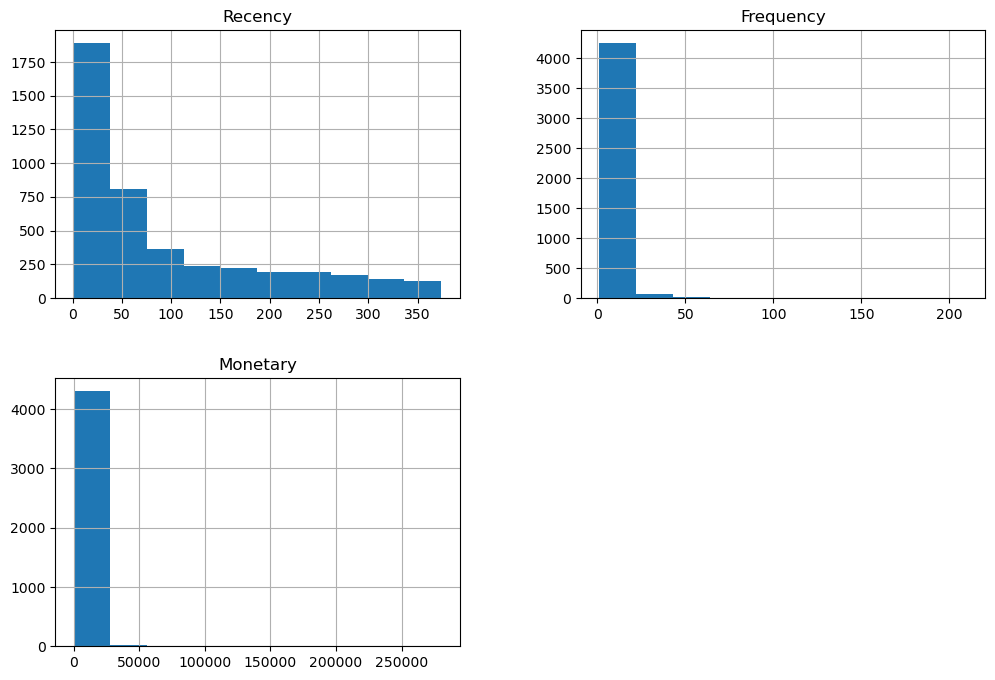

In [43]:
cols_to_plot = ['Recency', 'Frequency', 'Monetary']
rfm[cols_to_plot].hist(figsize=(12,8))
plt.show()

##### **Correlation Analysis of Key Variables**

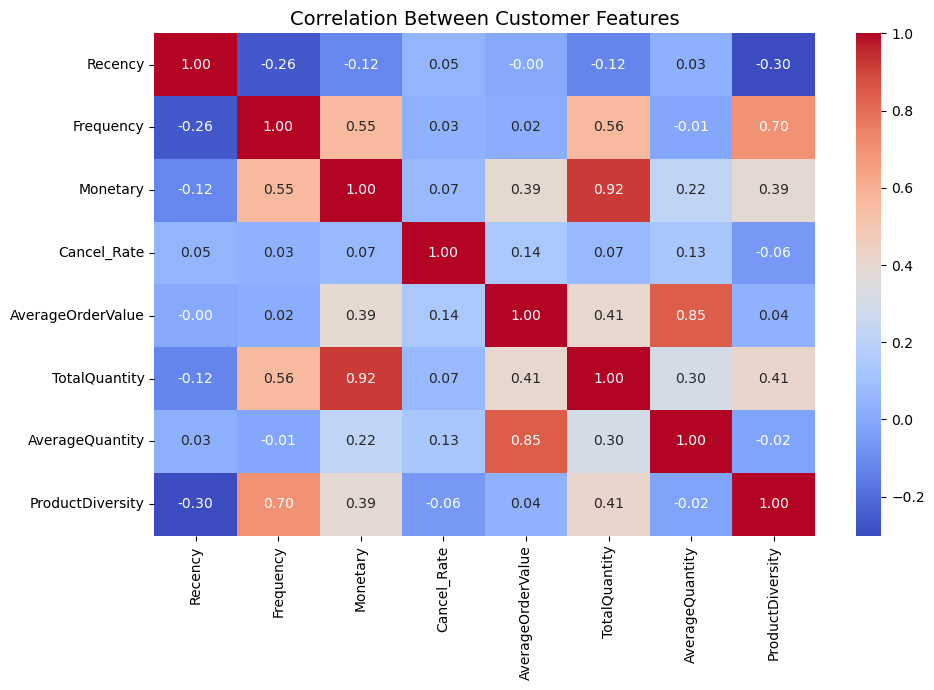

In [44]:
# Select only numerical features
numerical_features = customer_df[[
    'Recency', 'Frequency', 'Monetary', 'Cancel_Rate',
    'AverageOrderValue', 'TotalQuantity', 'AverageQuantity', 'ProductDiversity'
]]

# Compute correlation matrix
corr_matrix = numerical_features.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Between Customer Features', fontsize=14)
plt.tight_layout()
plt.show()

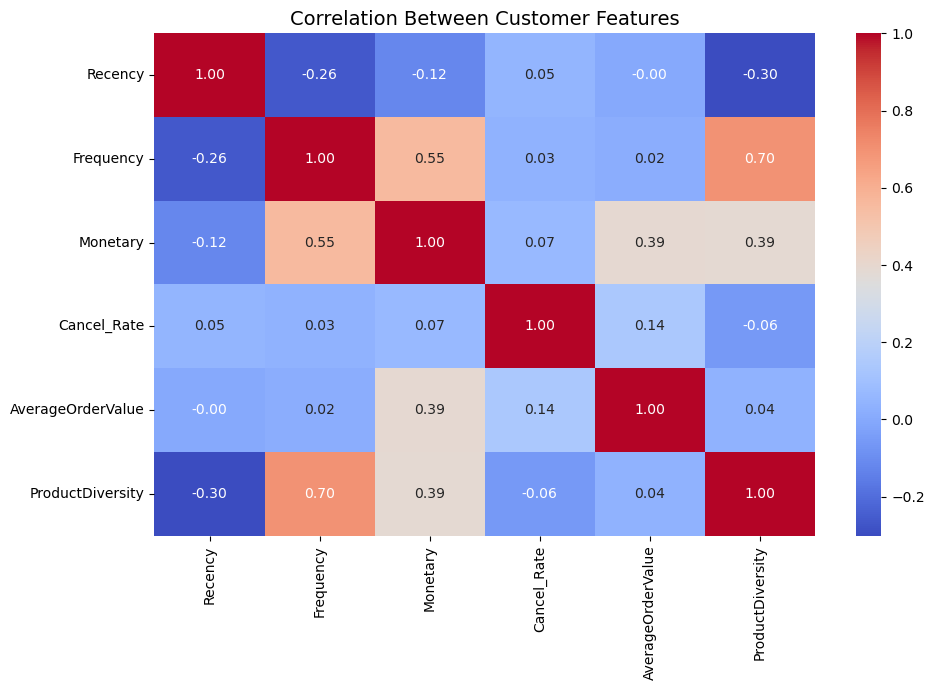

In [45]:
# Select only numerical features
numerical_features = customer_df[[
    'Recency', 'Frequency', 'Monetary', 'Cancel_Rate',
    'AverageOrderValue', 'ProductDiversity'
]]

# Compute correlation matrix
corr_matrix = numerical_features.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Between Customer Features', fontsize=14)
plt.tight_layout()
plt.show()

##### **Plotting Outliers RFM**

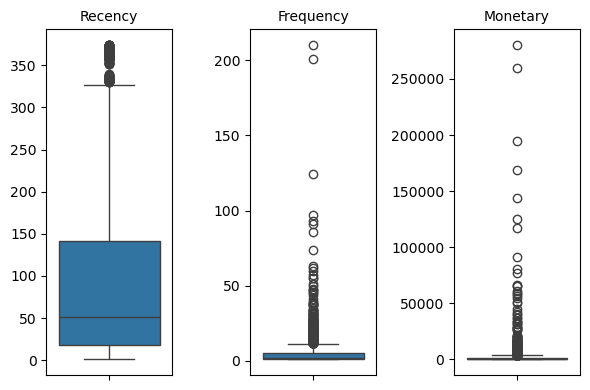

In [46]:
numeric_features = ["Recency", "Frequency", "Monetary"]

plt.figure(figsize=(6, 4))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=rfm[feature])
    plt.title(feature, fontsize=10)
    plt.ylabel('')
plt.tight_layout()
plt.show()

##### **Plotting Outliers of Numerical Features**

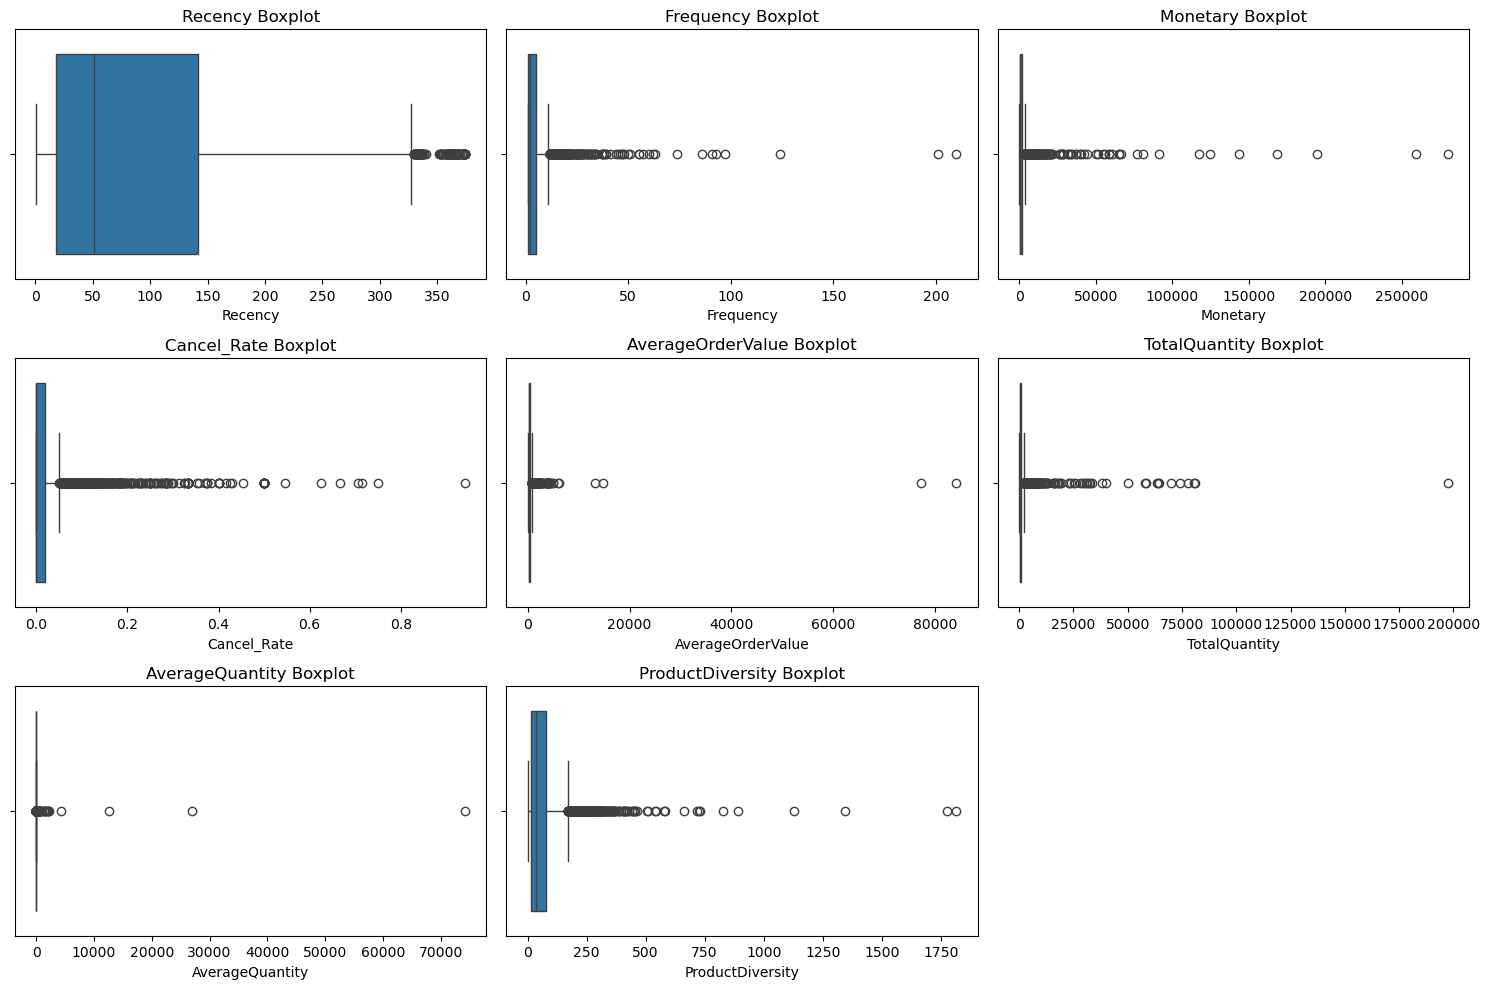

In [47]:
# Numerical features to check
numerical_features = [
    'Recency', 'Frequency', 'Monetary', 'Cancel_Rate',
    'AverageOrderValue', 'TotalQuantity', 'AverageQuantity', 'ProductDiversity'
]

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=customer_df[col])
    plt.title(f'{col} Boxplot')
    plt.tight_layout()

plt.show()

### **Step 8. Feature Scaling**

##### **Log Transformation of Features**
##### Apply `np.log1p` to reduce skew in features with large or uneven values

In [48]:
features = ["Recency", "Frequency", "Monetary"]
rfm = rfm[features].apply(np.log1p)

In [49]:
# Optimal numeric features for clustering
clustering_features = [
    'Recency', 
    'Frequency', 
    'Monetary', 
    'AverageOrderValue',  
    'ProductDiversity', 
    'Cancel_Rate'
]

# Clip Cancel_Rate
customer_df['Cancel_Rate'] = customer_df['Cancel_Rate'].clip(upper=0.99)

# Apply log1p to skewed features to reduce influence of outliers
skewed_features = ['Recency', 'Frequency', 'Monetary', 'AverageOrderValue', 'ProductDiversity']
customer_df[skewed_features] = customer_df[skewed_features].apply(np.log1p)

##### **Standardizing the Features**
##### This ensures that all features contribute **equally** to clustering or other machine learning algorithms.

In [50]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)
customer_scaled = scaler.fit_transform(customer_df[clustering_features])

In [51]:
joblib.dump(rfm_scaled, 'Scaler.pkl')

['Scaler.pkl']

In [52]:
rfm_scaled

array([[ 1.46223615, -0.95501313,  3.69768662],
       [-2.03861142,  1.07452296,  1.41181999],
       [ 0.37331015,  0.38643726,  0.71904602],
       ...,
       [-1.21878858, -0.36141188, -1.10875557],
       [-1.65741551,  2.1780455 ,  0.8215225 ],
       [-0.03453985,  0.05975492,  0.73649444]])

In [53]:
customer_scaled

array([[ 1.46223615, -0.95501313,  3.69768662,  7.4760734 , -2.52399774,
         7.20645556],
       [-2.03861142,  1.07452296,  1.41181999,  1.03923064,  0.96164532,
        -0.37435637],
       [ 0.37331015,  0.38643726,  0.71904602,  0.62010428, -0.36944829,
        -0.37435637],
       ...,
       [-1.21878858, -0.36141188, -1.10875557, -1.52550867, -0.87276215,
         0.79192239],
       [-1.65741551,  2.1780455 ,  0.8215225 , -1.04766169,  1.81300448,
        -0.37435637],
       [-0.03453985,  0.05975492,  0.73649444,  1.03210664,  0.47641451,
        -0.37435637]])

### **Step 9. Customer Segmentation (Clustering)**

#### **Elbow Method**

##### **RFM**

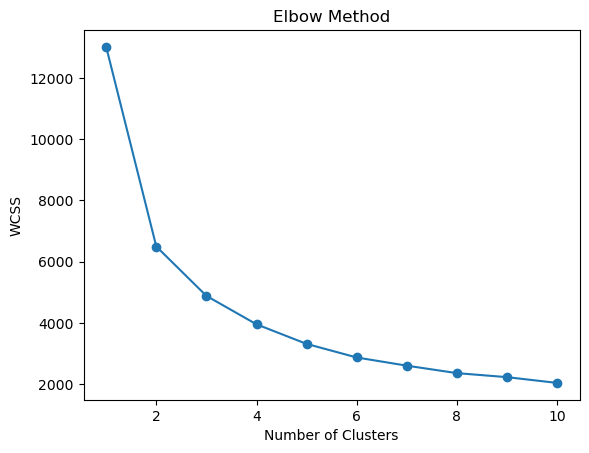

In [54]:
wcss = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(rfm_scaled)
    wcss.append(model.inertia_)

plt.figure()
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

##### **Customer-Level Aggregation Features**

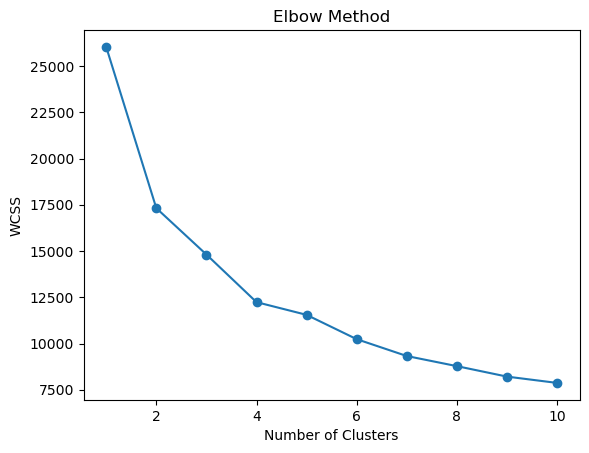

In [55]:
wcss = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(customer_scaled)
    wcss.append(model.inertia_)

plt.figure()
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

#### **Silhouette Score**

##### **RFM**

K=2 | Silhouette Score: 0.433
K=3 | Silhouette Score: 0.336
K=4 | Silhouette Score: 0.337
K=5 | Silhouette Score: 0.319
K=6 | Silhouette Score: 0.314
K=7 | Silhouette Score: 0.309
K=8 | Silhouette Score: 0.304
K=9 | Silhouette Score: 0.281
K=10 | Silhouette Score: 0.277


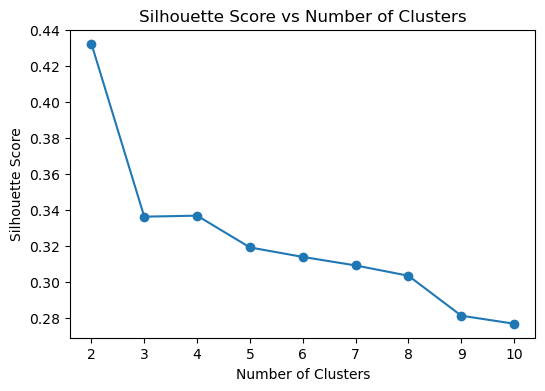

In [56]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, labels)
    silhouette_scores.append(score)
    print(f"K={k} | Silhouette Score: {score:.3f}")
    
plt.figure(figsize=(6,4))
plt.plot(range(2,11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.show()

##### **Customer-Level Aggregation Features**

K=2 | Silhouette Score: 0.315
K=3 | Silhouette Score: 0.331
K=4 | Silhouette Score: 0.236
K=5 | Silhouette Score: 0.221
K=6 | Silhouette Score: 0.214
K=7 | Silhouette Score: 0.195
K=8 | Silhouette Score: 0.202
K=9 | Silhouette Score: 0.198
K=10 | Silhouette Score: 0.191


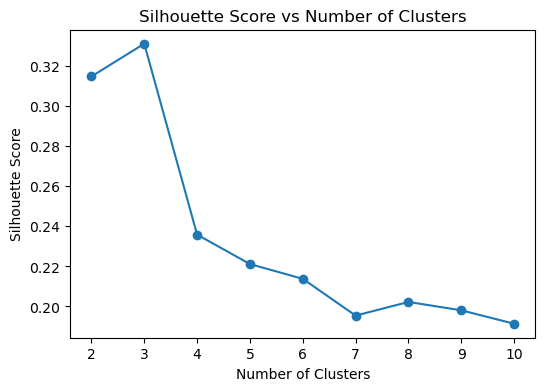

In [57]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(customer_scaled)
    score = silhouette_score(customer_scaled, labels)
    silhouette_scores.append(score)
    print(f"K={k} | Silhouette Score: {score:.3f}")
    
plt.figure(figsize=(6,4))
plt.plot(range(2,11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.show()

#### **Feature Selection for Clustering and Profiling**

#### **Features for Clustering**
Use features that **define the segments clearly and create distinct clusters**:
- Recency: Days since last purchase (engagement)
- Frequency: Number of purchases (loyalty)
- Monetary: Total spending (customer value)

1. **Strong Cluster Separation**  
   - RFM features (Recency, Frequency, Monetary) produce the **highest Silhouette Score (0.433)**, indicating compact and well-separated clusters.

2. **Balanced Cluster Sizes**  
   - Using RFM-only features creates clusters with **reasonably balanced customer counts**, avoiding tiny or impractical segments.

3. **Simplicity & Interpretability**  
   - RFM is easy to understand and interpret for business teams.  
   - Each feature has a clear meaning: Recency → engagement, Frequency → loyalty, Monetary → value.

4. **Reduces Noise**  
   - Adding additional behavioral features (AverageOrderValue, ProductDiversity, Cancel_Rate) may introduce **noise**, lower cluster separation, and create **imbalanced clusters**.

5. **Actionable Segments**  
   - RFM captures the core patterns of customer behavior needed for **marketing campaigns, retention strategies, and targeting**.

**Summary:** RFM-only features are sufficient to generate **distinct, interpretable, and actionable clusters**, while extra features are reserved for profiling and deeper insights.

#### **Features for Profiling**
- Recency: Days since last purchase (engagement)
- Frequency: Number of purchases (loyalty)
- Monetary: Total spending (customer value)
- AverageOrderValue: Typical spend per order
- TotalQuantity: Total units purchased
- AverageQuantity: Average quantity per order
- ProductDiversity: Number of different products purchased
- TopProduct: Most purchased product
- Cancel_Rate: Order cancellation rate


#### **K-Means Clustering**

In [58]:
optimal_k = 4  # Example based on silhouette + elbow

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm['KMeans_Segment'] = kmeans_final.fit_predict(rfm_scaled)

rfm['KMeans_Segment'].value_counts()

KMeans_Segment
3    1600
1    1186
0     836
2     717
Name: count, dtype: int64

In [59]:
joblib.dump(kmeans_final, 'Segmentation_model.pkl')

['Segmentation_model.pkl']

In [60]:
optimal_k = 4  # Example based on silhouette + elbow

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customer_df['KMeans_Segment'] = kmeans_final.fit_predict(customer_scaled)

customer_df['KMeans_Segment'].value_counts()

KMeans_Segment
2    1814
1    1338
0    1097
3      90
Name: count, dtype: int64

### **Cluster Size Comparison**

#### **RFM Features**
- Clusters are well-balanced: 1600, 1186, 836, 717 customers.  
- ✅ Produces **distinct and actionable segments**.

#### **Clustering Features**
- Cluster sizes are imbalanced: 1813, 1339, 1095, 91 customers.  
- ⚠️ One cluster is very small → **less practical for segmentation**.

#### **Takeaway**
- **Use RFM-only features** for clustering.  
- **Use additional features** (AverageOrderValue, ProductDiversity, Cancel_Rate) for **profiling clusters** only.

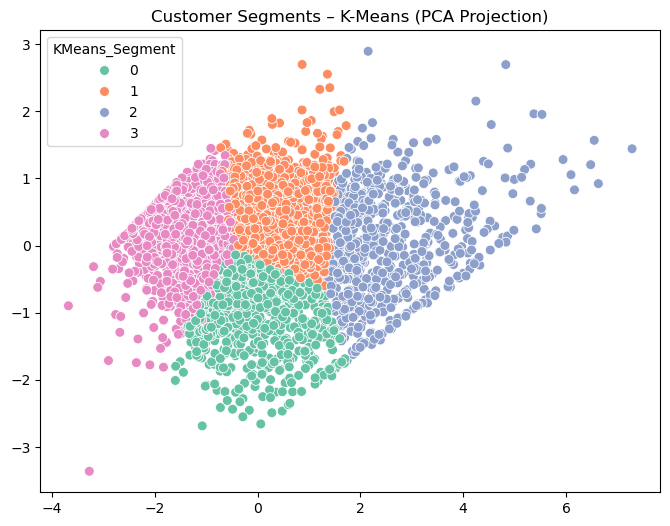

In [61]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(rfm_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0], y=X_pca[:,1],
    hue=rfm['KMeans_Segment'],
    palette='Set2',
    s=50
)
plt.title("Customer Segments – K-Means (PCA Projection)")
plt.show()

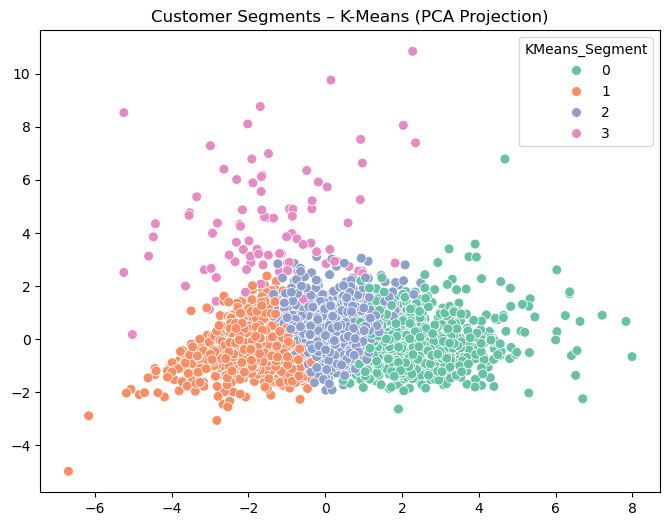

In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(customer_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0], y=X_pca[:,1],
    hue=customer_df['KMeans_Segment'],
    palette='Set2',
    s=50
)
plt.title("Customer Segments – K-Means (PCA Projection)")
plt.show()

In [63]:
# Features available for profiling
profiling_features = [
    'Recency', 
    'Frequency', 
    'Monetary', 
    'AverageOrderValue', 
    'TotalQuantity', 
    'AverageQuantity', 
    'ProductDiversity', 
    'Cancel_Rate'
]

# Group by KMeans segment and calculate mean
kmeans_profile = customer_df.groupby('KMeans_Segment')[profiling_features].mean()
kmeans_profile

,Recency,Frequency,Monetary,AverageOrderValue,TotalQuantity,AverageQuantity,ProductDiversity,Cancel_Rate
KMeans_Segment,,,,,,,,
0,2.509538,2.250747,8.076513,5.959222,3441.481313,43.320869,4.695073,0.025953
1,4.656356,0.850981,5.293123,5.037951,159.318386,28.980190,2.498526,0.009914
2,3.972268,1.179602,6.669176,5.907476,580.478501,21.518276,3.713800,0.017216
3,4.795225,1.006116,6.012929,5.533667,1382.500000,919.486737,2.130197,0.379639


#### **Hierarchical Clustering**

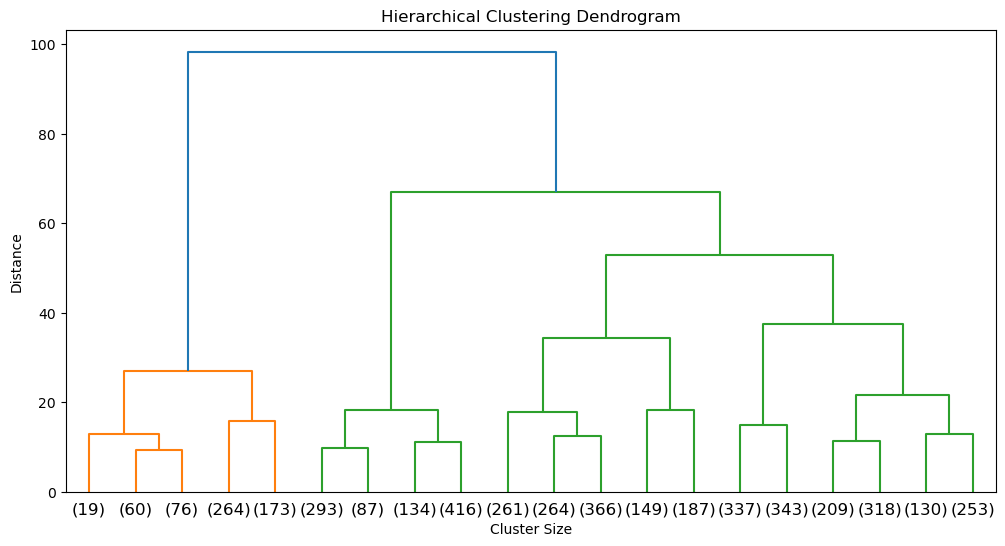

In [64]:
# Create linkage matrix
linked = linkage(rfm_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12,6))
dendrogram(linked, truncate_mode='lastp', p=20)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

#### **Agglomerative Clustering**

In [65]:
agglo = AgglomerativeClustering(n_clusters=4, linkage='ward')
rfm['Agglomerative_Segment'] = agglo.fit_predict(rfm_scaled)

rfm['Agglomerative_Segment'].value_counts()

Agglomerative_Segment
0    1590
1    1227
2     930
3     592
Name: count, dtype: int64

In [66]:
agglo = AgglomerativeClustering(n_clusters=4, linkage='ward')
customer_df['Agglomerative_Segment'] = agglo.fit_predict(customer_scaled)

customer_df['Agglomerative_Segment'].value_counts()

Agglomerative_Segment
0    2066
1    1233
3     967
2      73
Name: count, dtype: int64

In [67]:
agglo_profile = customer_df.groupby('Agglomerative_Segment')[profiling_features].mean()
agglo_profile

,Recency,Frequency,Monetary,AverageOrderValue,TotalQuantity,AverageQuantity,ProductDiversity,Cancel_Rate
Agglomerative_Segment,,,,,,,,
0,4.474332,0.885067,5.662657,5.357447,247.717328,29.516370,2.821657,0.016091
1,3.862413,1.443266,7.078818,5.933371,910.113544,12.907480,4.065929,0.016857
2,4.883483,0.898131,5.923549,5.594903,2696.712329,1498.625534,1.883346,0.408543
3,2.334655,2.238233,7.985038,5.893978,3448.885212,22.534685,4.593336,0.024078


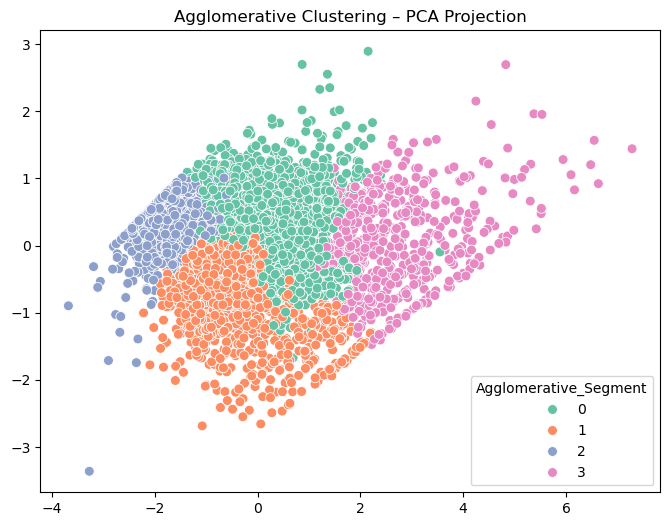

In [68]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(rfm_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=rfm['Agglomerative_Segment'],
    palette='Set2',
    s=50
)
plt.title("Agglomerative Clustering – PCA Projection")
plt.show()

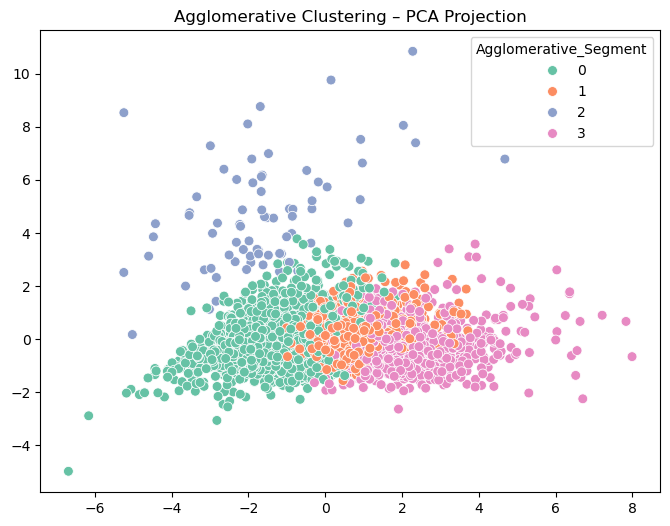

In [69]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(customer_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=customer_df['Agglomerative_Segment'],
    palette='Set2',
    s=50
)
plt.title("Agglomerative Clustering – PCA Projection")
plt.show()

#### **DBSCAN**

In [70]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
rfm['DBSCAN_Segment'] = dbscan.fit_predict(rfm_scaled)

rfm['DBSCAN_Segment'].value_counts()

DBSCAN_Segment
 0    2791
 1    1485
-1      63
Name: count, dtype: int64

In [71]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
customer_df['DBSCAN_Segment'] = dbscan.fit_predict(customer_scaled)

customer_df['DBSCAN_Segment'].value_counts()

DBSCAN_Segment
 0    3994
-1     329
 3       6
 1       5
 2       5
Name: count, dtype: int64

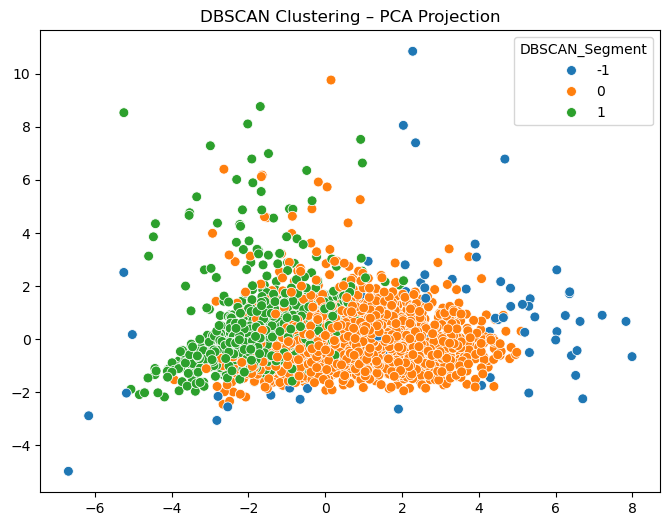

In [72]:
# Ensure the DBSCAN labels have the same length as X_pca
dbscan_labels = rfm['DBSCAN_Segment'].iloc[:X_pca.shape[0]]

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=dbscan_labels,
    palette='tab10',
    s=50
)
plt.title("DBSCAN Clustering – PCA Projection")
plt.show()

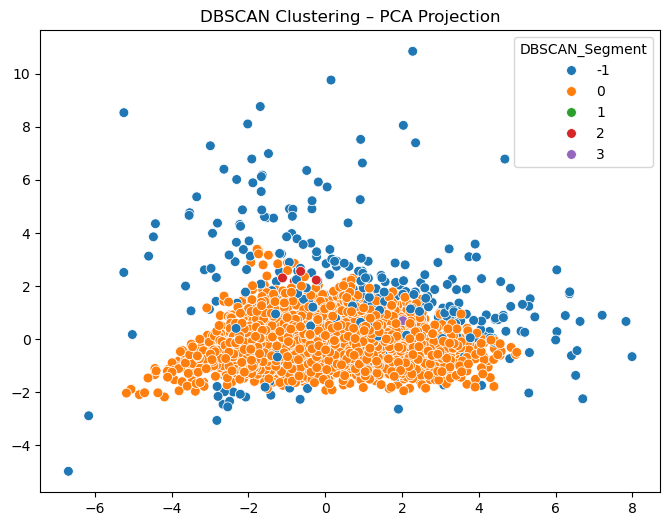

In [73]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=customer_df['DBSCAN_Segment'],
    palette='tab10',
    s=50
)
plt.title("DBSCAN Clustering – PCA Projection")
plt.show()

In [74]:
outliers = rfm[rfm['DBSCAN_Segment'] == -1]

print(f"Number of Outlier Customers: {len(outliers)}")
outliers[['Recency','Frequency','Monetary']].describe()

Number of Outlier Customers: 63


,Recency,Frequency,Monetary
count,63.000000,63.000000,63.000000
mean,2.699818,2.711984,8.955329
std,1.651200,1.374697,3.005605
min,0.693147,0.693147,0.000000
25%,1.386294,1.386294,8.425826
50%,2.397895,2.772589,10.244167
75%,3.899467,3.911823,10.957303
max,5.921578,5.351858,12.543284


In [75]:
outliers = customer_df[customer_df['DBSCAN_Segment'] == -1]

print(f"Number of Outlier Customers: {len(outliers)}")
outliers[['Recency','Frequency','Monetary','AverageOrderValue',
    'TotalQuantity', 'AverageQuantity', 'ProductDiversity', 'Cancel_Rate']].describe()

Number of Outlier Customers: 329


,Recency,Frequency,Monetary,AverageOrderValue,TotalQuantity,AverageQuantity,ProductDiversity,Cancel_Rate
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,3.350169,1.847868,7.533471,5.985052,6452.413374,449.413423,3.173950,0.152175
std,1.549090,1.049109,2.072801,1.469466,17126.673412,4407.146080,1.565156,0.167404
min,0.693147,0.693147,0.000000,0.000000,1.000000,1.000000,0.693147,0.000000
25%,2.197225,1.098612,6.114611,5.072451,196.000000,9.636364,1.945910,0.011834
50%,3.332205,1.609438,7.529943,5.983284,1006.000000,21.116667,3.135494,0.105019
75%,4.615121,2.564949,9.040659,6.860853,4252.000000,60.000000,4.304065,0.230159
max,5.921578,5.351858,12.543284,11.341393,197491.000000,74215.000000,7.504942,0.941176


#### **Gaussian Mixture Model**

K=4 | BIC=3863.14 | AIC=3614.50


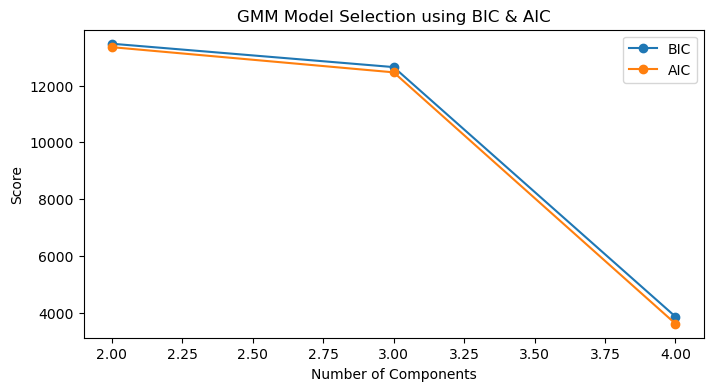

In [76]:
bic_scores = []
aic_scores = []
K = range(2, 5)

for k in K:
    gmm = GaussianMixture(
        n_components=k,
        covariance_type='full',
        random_state=42
    )
    gmm.fit(rfm_scaled)

    bic = gmm.bic(rfm_scaled)
    aic = gmm.aic(rfm_scaled)
    
    bic_scores.append(bic)
    aic_scores.append(aic)
    
print(f"K={k} | BIC={bic:.2f} | AIC={aic:.2f}")

plt.figure(figsize=(8,4))
plt.plot(K, bic_scores, marker='o', label='BIC')
plt.plot(K, aic_scores, marker='o', label='AIC')
plt.xlabel("Number of Components")
plt.ylabel("Score")
plt.title("GMM Model Selection using BIC & AIC")
plt.legend()
plt.show()

K=4 | BIC=-7759.01 | AIC=-8466.68


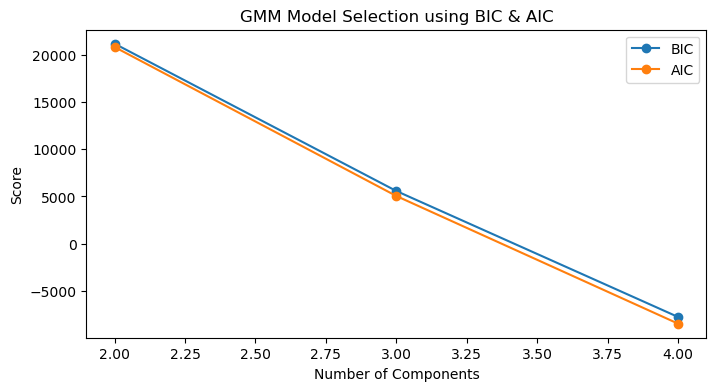

In [77]:
bic_scores = []
aic_scores = []
K = range(2, 5)

for k in K:
    gmm = GaussianMixture(
        n_components=k,
        covariance_type='full',
        random_state=42
    )
    gmm.fit(customer_scaled)

    bic = gmm.bic(customer_scaled)
    aic = gmm.aic(customer_scaled)
    
    bic_scores.append(bic)
    aic_scores.append(aic)
    
print(f"K={k} | BIC={bic:.2f} | AIC={aic:.2f}")

plt.figure(figsize=(8,4))
plt.plot(K, bic_scores, marker='o', label='BIC')
plt.plot(K, aic_scores, marker='o', label='AIC')
plt.xlabel("Number of Components")
plt.ylabel("Score")
plt.title("GMM Model Selection using BIC & AIC")
plt.legend()
plt.show()

In [78]:
best_bic_k = K[bic_scores.index(min(bic_scores))]
best_aic_k = K[aic_scores.index(min(aic_scores))]

print(f"Best K according to BIC: {best_bic_k}")
print(f"Best K according to AIC: {best_aic_k}")

Best K according to BIC: 4
Best K according to AIC: 4


In [79]:
optimal_k = 4  # Selected based on BIC minimum

gmm_final = GaussianMixture(
    n_components=optimal_k,
    covariance_type='full',
    random_state=42
)

rfm['GMM_Segment'] = gmm_final.fit_predict(rfm_scaled)

rfm['GMM_Segment'].value_counts()

GMM_Segment
3    1494
2    1103
1     907
0     835
Name: count, dtype: int64

In [80]:
optimal_k = 4  # Selected based on BIC minimum

gmm_final = GaussianMixture(
    n_components=optimal_k,
    covariance_type='full',
    random_state=42
)

customer_df['GMM_Segment'] = gmm_final.fit_predict(customer_scaled)

customer_df['GMM_Segment'].value_counts()

GMM_Segment
0    1905
2    1100
1     989
3     345
Name: count, dtype: int64

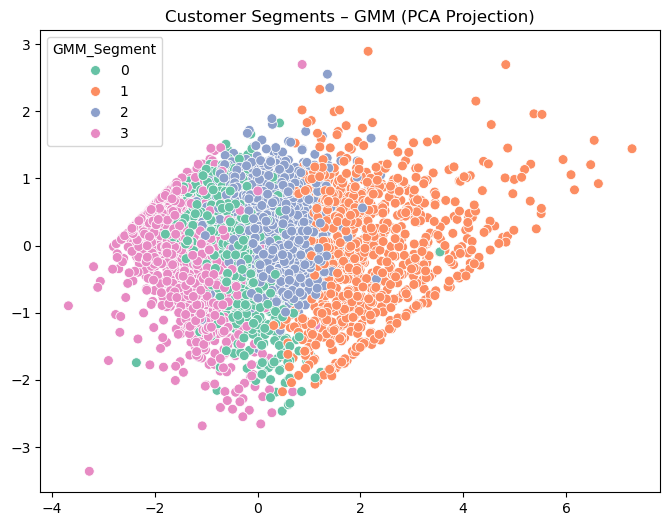

In [81]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(rfm_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=rfm['GMM_Segment'],
    palette='Set2',
    s=50
)
plt.title("Customer Segments – GMM (PCA Projection)")
plt.show()

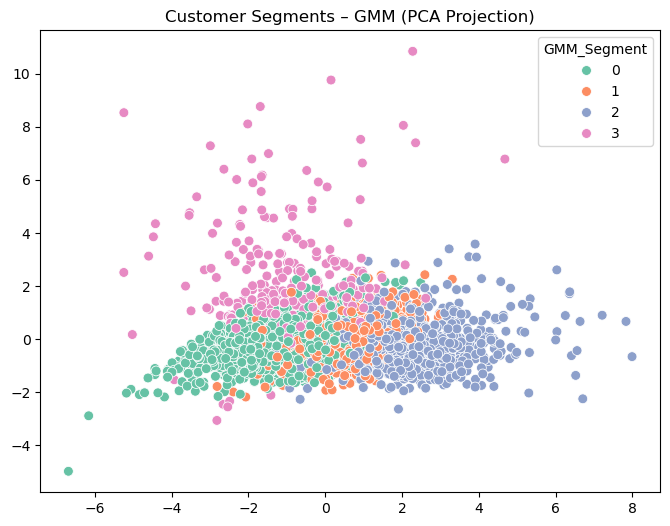

In [82]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(customer_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=customer_df['GMM_Segment'],
    palette='Set2',
    s=50
)
plt.title("Customer Segments – GMM (PCA Projection)")
plt.show()

In [83]:
gmm_profile = customer_df.groupby('GMM_Segment')[profiling_features].mean()
gmm_profile

,Recency,Frequency,Monetary,AverageOrderValue,TotalQuantity,AverageQuantity,ProductDiversity,Cancel_Rate
GMM_Segment,,,,,,,,
0,4.405565,0.825535,5.718717,5.493240,273.123885,28.282299,2.941732,0.000000
1,3.708699,1.418105,6.834078,5.703052,712.403438,14.988390,3.890214,0.019973
2,2.751404,2.299647,8.006339,5.829315,3293.564545,19.730812,4.554442,0.025779
3,4.444586,0.965993,6.148261,5.724779,922.020290,341.105089,2.784831,0.171084


#### **Clustering Model Evaluation**

##### This section evaluates various clustering models using three commonly used metrics:

##### - **Silhouette Score**: Measures the quality of the clustering by comparing the distance between points in the same cluster to the distance between points in different clusters.
##### - **Davies-Bouldin Score**: Measures the average similarity of each cluster to its most similar cluster, with a lower value indicating better clustering.
##### - **Calinski-Harabasz Score**: Measures the ratio of the sum of between-cluster dispersion to within-cluster dispersion, with higher values indicating better clustering.

In [84]:
def evaluate_clusters(X, labels, model_name):
    unique_labels = set(labels)
    
    # Remove noise label if present
    unique_labels.discard(-1)
    
    if len(unique_labels) <= 1:
        return {
            'Model': model_name,
            'Silhouette': np.nan,
            'Davies_Bouldin': np.nan,
            'Calinski_Harabasz': np.nan
        }
    
    return {
        'Model': model_name,
        'Silhouette': silhouette_score(X, labels),
        'Davies_Bouldin': davies_bouldin_score(X, labels),
        'Calinski_Harabasz': calinski_harabasz_score(X, labels)
    }

# Create an empty list to store the results
results = []

# Evaluate K-Means, Agglomerative, and GMM (KMeans and Agglomerative segments are assumed to be already created)
results.append(evaluate_clusters(rfm_scaled, rfm['KMeans_Segment'], 'K-Means'))
results.append(evaluate_clusters(rfm_scaled, rfm['Agglomerative_Segment'], 'Agglomerative'))
results.append(evaluate_clusters(rfm_scaled, rfm['GMM_Segment'], 'GMM'))

# Evaluate DBSCAN (Make sure to exclude noise points: -1)
dbscan_labels = rfm['DBSCAN_Segment']
mask = dbscan_labels != -1  # Remove noise (-1)
results.append(evaluate_clusters(rfm_scaled[mask], dbscan_labels[mask], 'DBSCAN'))

# Create the evaluation DataFrame
evaluation_df_rfm = pd.DataFrame(results)

# Display the evaluation results
evaluation_df_rfm

,Model,Silhouette,Davies_Bouldin,Calinski_Harabasz
0,K-Means,0.336923,1.010860,3313.350707
1,Agglomerative,0.275289,1.128359,2686.382361
2,GMM,0.174884,1.715877,2159.713418
3,DBSCAN,0.293020,1.063672,2389.683454


In [85]:
def evaluate_clusters(X, labels, model_name):
    unique_labels = set(labels)
    
    # Remove noise label if present
    unique_labels.discard(-1)
    
    if len(unique_labels) <= 1:
        return {
            'Model': model_name,
            'Silhouette': np.nan,
            'Davies_Bouldin': np.nan,
            'Calinski_Harabasz': np.nan
        }
    
    return {
        'Model': model_name,
        'Silhouette': silhouette_score(X, labels),
        'Davies_Bouldin': davies_bouldin_score(X, labels),
        'Calinski_Harabasz': calinski_harabasz_score(X, labels)
    }

# Create an empty list to store the results
results = []

# Evaluate K-Means, Agglomerative, and GMM (KMeans and Agglomerative segments are assumed to be already created)
results.append(evaluate_clusters(customer_scaled, customer_df['KMeans_Segment'], 'K-Means'))
results.append(evaluate_clusters(customer_scaled, customer_df['Agglomerative_Segment'], 'Agglomerative'))
results.append(evaluate_clusters(customer_scaled, customer_df['GMM_Segment'], 'GMM'))

# Evaluate DBSCAN (Make sure to exclude noise points: -1)
dbscan_labels = customer_df['DBSCAN_Segment']
mask = dbscan_labels != -1  # Remove noise (-1)
results.append(evaluate_clusters(customer_scaled[mask], dbscan_labels[mask], 'DBSCAN'))

# Create the evaluation DataFrame
evaluation_df = pd.DataFrame(results)

# Display the evaluation results
evaluation_df

,Model,Silhouette,Davies_Bouldin,Calinski_Harabasz
0,K-Means,0.235887,1.214705,1629.449680
1,Agglomerative,0.166581,1.407693,1250.838241
2,GMM,0.127487,1.745358,1003.435225
3,DBSCAN,-0.128125,1.004326,7.746450


#### **Evaluation Results:**

##### After evaluating various clustering models, **K-Means** was selected as the best for customer segmentation based on the following:

- **Highest Silhouette Score (0.337):** Indicates better cluster separation compared to the other models.
- **Highest Calinski-Harabasz Score (3313.35):** Demonstrates more well-defined and cohesive clusters.
- **Competitive Davies-Bouldin Score (1.011):** Although not the lowest overall, it reflects reasonably compact and separated clusters when balanced with the other metrics.

While **DBSCAN** achieved a relatively low Davies-Bouldin Score (1.064), its lower Silhouette Score (0.293) and Calinski-Harabasz Score (2389.68) suggest slightly less distinct clustering compared to K-Means.

**Conclusion:**  
**K-Means clustering** provides the most balanced and reliable segmentation performance among the evaluated models and is selected as the optimal approach.


### **Step 10. Cluster Interpretation**

In [86]:
rfm.head()

,Recency,Frequency,Monetary,KMeans_Segment,Agglomerative_Segment,DBSCAN_Segment,GMM_Segment
0,5.789960,0.693147,11.253955,1,0,-1,3
1,1.098612,2.079442,8.368925,2,3,0,1
2,4.330733,1.609438,7.494564,1,0,0,2
3,2.995732,0.693147,7.472245,0,0,1,3
4,5.739793,0.693147,5.815324,3,2,1,3


In [87]:
rfm.columns

Index(['Recency', 'Frequency', 'Monetary', 'KMeans_Segment',
       'Agglomerative_Segment', 'DBSCAN_Segment', 'GMM_Segment'],
      dtype='object')

In [88]:
rfm.groupby('KMeans_Segment')[['Recency','Frequency','Monetary']].mean()

,Recency,Frequency,Monetary
KMeans_Segment,,,
0,2.697789,1.091035,6.082810
1,4.021275,1.557998,7.237985
2,2.165149,2.478704,8.355012
3,5.027148,0.813068,5.575725


In [89]:
rfm_sum = rfm.groupby("KMeans_Segment")[["Recency","Frequency","Monetary"]].mean()

rfm_sum["R_Score"] = rfm["Recency"].rank(ascending=True)
rfm_sum["F_Score"] = rfm["Frequency"].rank(ascending=False)
rfm_sum["M_Score"] = rfm["Monetary"].rank(ascending=False)

rfm_sum["RFM_Total"] = (
    rfm_sum["R_Score"] +
    rfm_sum["F_Score"] +
    rfm_sum["M_Score"]
)

rfm_sum.sort_values("RFM_Total")

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Total
KMeans_Segment,,,,,,,
1,4.021275,1.557998,7.237985,136.5,629.0,335.0,1100.5
2,2.165149,2.478704,8.355012,2687.0,1309.0,1004.0,5000.0
3,5.027148,0.813068,5.575725,1158.0,3592.5,1027.0,5777.5
0,2.697789,1.091035,6.082810,4179.0,3592.5,10.0,7781.5


In [90]:
rfm["Segment_Labels"] = rfm["KMeans_Segment"].map({
    0: "New Shoppers",  
    1: "Lost Customers",       
    2: "Loyal Regulars",  
    3: "At-Risk VIPs"    
})

rfm["Segment_Action"] = rfm["KMeans_Segment"].map({
    0: "Welcome offers and loyalty rewards",   
    1: "Educate and Re-activate",                             
    2: "Loyalty programs and cross-sell",              
    3: "Winback campaigns and personalized discounts"     
})

In [91]:
rfm[["Segment_Labels", "Segment_Action"]].value_counts()

Segment_Labels  Segment_Action                              
At-Risk VIPs    Winback campaigns and personalized discounts    1600
Lost Customers  Educate and Re-activate                         1186
New Shoppers    Welcome offers and loyalty rewards               836
Loyal Regulars  Loyalty programs and cross-sell                  717
Name: count, dtype: int64

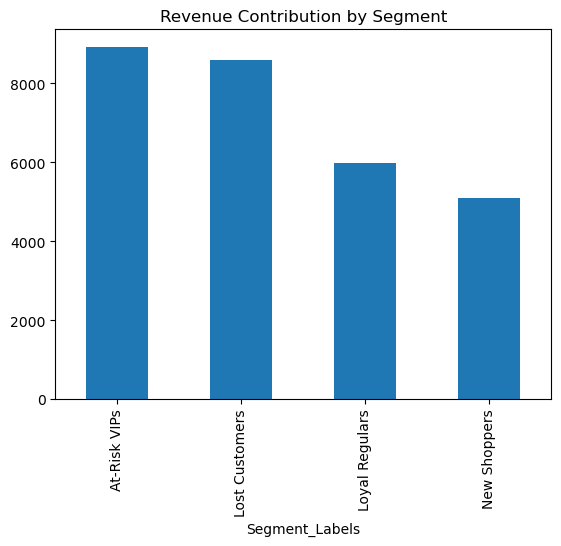

In [92]:
rfm.groupby("Segment_Labels")[["Recency","Frequency","Monetary"]].mean()
rfm.groupby("Segment_Labels")["Monetary"].sum().plot(
    kind="bar", title="Revenue Contribution by Segment"
)
plt.show()

In [93]:
customer_df.head()

,CustomerID,FirstPurchase,LastPurchase,TotalQuantity,AverageQuantity,ProductDiversity,TopProduct,Recency,Frequency,Monetary,AverageOrderValue,Cancel_Rate,KMeans_Segment,Agglomerative_Segment,DBSCAN_Segment,GMM_Segment
0,12346.0,2011-01-18 10:01:00,2011-01-18 10:01:00,74215,74215.000000,0.693147,MEDIUM CERAMIC TOP STORAGE JAR,5.789960,0.693147,11.253955,11.253955,0.5,3,2,-1,3
1,12347.0,2010-12-07 14:57:00,2011-12-07 15:52:00,2458,13.505495,4.644391,AIRLINE BAG VINTAGE JET SET BROWN,1.098612,2.079442,8.368925,6.424406,0.0,0,3,0,2
2,12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00,2341,75.516129,3.135494,POSTAGE,4.330733,1.609438,7.494564,6.109936,0.0,2,1,0,1
3,12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00,631,8.643836,4.304065,16 PIECE CUTLERY SET PANTRY DESIGN,2.995732,0.693147,7.472245,7.472245,0.0,2,1,0,0
4,12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,197,11.588235,2.890372,4 TRADITIONAL SPINNING TOPS,5.739793,0.693147,5.815324,5.815324,0.0,1,0,0,0


In [94]:
customer_df["Segment_Labels"] = customer_df["KMeans_Segment"].map({
    0: "New Shoppers",  
    1: "Lost Customers",       
    2: "Loyal Regulars",  
    3: "At-Risk VIPs"  
})

customer_df["Segment_Action"] = customer_df["KMeans_Segment"].map({
    0: "Welcome offers and loyalty rewards",   
    1: "Educate and Re-activate",                             
    2: "Loyalty programs and cross-sell",              
    3: "Winback campaigns and personalized discounts"
})

In [95]:
customer_df.groupby('KMeans_Segment')[['Recency','Frequency','Monetary','AverageOrderValue', 'ProductDiversity', 'Cancel_Rate']].mean()

,Recency,Frequency,Monetary,AverageOrderValue,ProductDiversity,Cancel_Rate
KMeans_Segment,,,,,,
0,2.509538,2.250747,8.076513,5.959222,4.695073,0.025953
1,4.656356,0.850981,5.293123,5.037951,2.498526,0.009914
2,3.972268,1.179602,6.669176,5.907476,3.713800,0.017216
3,4.795225,1.006116,6.012929,5.533667,2.130197,0.379639


In [96]:
customer_df[["Segment_Labels", "Segment_Action"]].value_counts()

Segment_Labels  Segment_Action                              
Loyal Regulars  Loyalty programs and cross-sell                 1814
Lost Customers  Educate and Re-activate                         1338
New Shoppers    Welcome offers and loyalty rewards              1097
At-Risk VIPs    Winback campaigns and personalized discounts      90
Name: count, dtype: int64

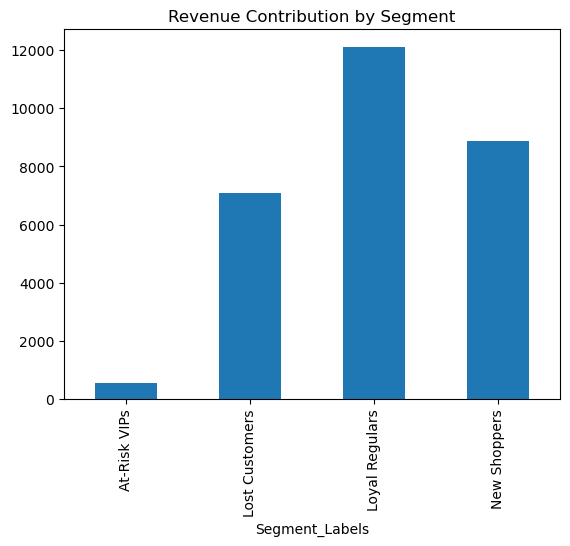

In [97]:
customer_df.groupby("Segment_Labels")[["Recency","Frequency","Monetary"]].mean()
customer_df.groupby("Segment_Labels")["Monetary"].sum().plot(
    kind="bar", title="Revenue Contribution by Segment"
)
plt.show()

### **Step 11. Customer Lifetime Value (CLV)**

In [98]:
rfm["CLV"] = rfm["Monetary"] * rfm["Frequency"]
rfm.groupby("Segment_Labels")["CLV"].count()

Segment_Labels
At-Risk VIPs      1600
Lost Customers    1186
Loyal Regulars     717
New Shoppers       836
Name: CLV, dtype: int64

In [99]:
customer_df["CLV"] = customer_df["Monetary"] * customer_df["Frequency"]
customer_df.groupby("Segment_Labels")["CLV"].count()

Segment_Labels
At-Risk VIPs        90
Lost Customers    1338
Loyal Regulars    1814
New Shoppers      1097
Name: CLV, dtype: int64

### **Step 12. Churn Definition**

In [100]:
rfm["Churn_Risk"] = np.where(rfm["Recency"] > rfm["Recency"].quantile(0.75), 1, 0)
rfm.head()

,Recency,Frequency,Monetary,KMeans_Segment,Agglomerative_Segment,DBSCAN_Segment,GMM_Segment,Segment_Labels,Segment_Action,CLV,Churn_Risk
0,5.789960,0.693147,11.253955,1,0,-1,3,Lost Customers,Educate and Re-activate,7.800647,1
1,1.098612,2.079442,8.368925,2,3,0,1,Loyal Regulars,Loyalty programs and cross-sell,17.402691,0
2,4.330733,1.609438,7.494564,1,0,0,2,Lost Customers,Educate and Re-activate,12.062035,0
3,2.995732,0.693147,7.472245,0,0,1,3,New Shoppers,Welcome offers and loyalty rewards,5.179365,0
4,5.739793,0.693147,5.815324,3,2,1,3,At-Risk VIPs,Winback campaigns and personalized discounts,4.030875,1


In [101]:
customer_df["Churn_Risk"] = np.where(customer_df["Recency"] > customer_df["Recency"].quantile(0.75), 1, 0)
customer_df.head()

,CustomerID,FirstPurchase,LastPurchase,TotalQuantity,AverageQuantity,ProductDiversity,TopProduct,Recency,Frequency,Monetary,AverageOrderValue,Cancel_Rate,KMeans_Segment,Agglomerative_Segment,DBSCAN_Segment,GMM_Segment,Segment_Labels,Segment_Action,CLV,Churn_Risk
0,12346.0,2011-01-18 10:01:00,2011-01-18 10:01:00,74215,74215.000000,0.693147,MEDIUM CERAMIC TOP STORAGE JAR,5.789960,0.693147,11.253955,11.253955,0.5,3,2,-1,3,At-Risk VIPs,Winback campaigns and personalized discounts,7.800647,1
1,12347.0,2010-12-07 14:57:00,2011-12-07 15:52:00,2458,13.505495,4.644391,AIRLINE BAG VINTAGE JET SET BROWN,1.098612,2.079442,8.368925,6.424406,0.0,0,3,0,2,New Shoppers,Welcome offers and loyalty rewards,17.402691,0
2,12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00,2341,75.516129,3.135494,POSTAGE,4.330733,1.609438,7.494564,6.109936,0.0,2,1,0,1,Loyal Regulars,Loyalty programs and cross-sell,12.062035,0
3,12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00,631,8.643836,4.304065,16 PIECE CUTLERY SET PANTRY DESIGN,2.995732,0.693147,7.472245,7.472245,0.0,2,1,0,0,Loyal Regulars,Loyalty programs and cross-sell,5.179365,0
4,12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,197,11.588235,2.890372,4 TRADITIONAL SPINNING TOPS,5.739793,0.693147,5.815324,5.815324,0.0,1,0,0,0,Lost Customers,Educate and Re-activate,4.030875,1


### **Step 13. Train-Test Split**

##### **RFM Features**

In [102]:
X_rfm = rfm[["Recency","Frequency","Monetary"]]
y_rfm = rfm["KMeans_Segment"]

X_train_rfm, X_test_rfm, y_train_rfm, y_test_rfm = train_test_split(
    X_rfm, y_rfm, test_size=0.3, random_state=42
)

##### **Predictive Features**

In [103]:
X = customer_df[["Recency","Frequency","Monetary","AverageOrderValue","ProductDiversity","Cancel_Rate" ]]
y = customer_df["KMeans_Segment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### **Step 14. Predictive Model Building**

#### **Logistic Regression**

##### **RFM Features**

In [104]:
# Initialize Logistic Rgression
log_model_rfm = LogisticRegression(max_iter=1000)
# Train the model
log_model_rfm.fit(X_train_rfm, y_train_rfm)
# Make predictions
y_pred_rfm = log_model_rfm.predict(X_test_rfm)
# Evaluate the model
print("Logistic Regression Evaluation of RFM:")
print(classification_report(y_test_rfm, y_pred_rfm))

Logistic Regression Evaluation of RFM:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       241
           1       0.96      0.99      0.97       353
           2       0.99      0.97      0.98       230
           3       1.00      0.99      0.99       478

    accuracy                           0.98      1302
   macro avg       0.99      0.98      0.98      1302
weighted avg       0.98      0.98      0.98      1302



##### **Predictive Features**

In [105]:
# Initialize Logistic Rgression
log_model = LogisticRegression(max_iter=1000)

# Train the model
log_model.fit(X_train, y_train)

# Make predictions
y_pred = log_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Evaluation of Predictive Features:")
print(classification_report(y_test, y_pred))

Logistic Regression Evaluation of Predictive Features:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       336
           1       0.98      0.98      0.98       387
           2       0.97      0.99      0.98       555
           3       0.85      0.46      0.59        24

    accuracy                           0.98      1302
   macro avg       0.95      0.85      0.89      1302
weighted avg       0.98      0.98      0.98      1302



#### **Random Forest**

##### **RFM Features**

In [106]:
# Initialize RandomForestClassifier
rf_rfm = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')  # class_weight='balanced' helps with imbalanced data

# Train the model
rf_rfm.fit(X_train_rfm, y_train_rfm)

# Make predictions
y_pred_rfm = rf_rfm.predict(X_test_rfm)

# Evaluate the model
print("Random Forest Classifier Evaluation of RFM:")
print(classification_report(y_test_rfm, y_pred_rfm))

Random Forest Classifier Evaluation of RFM:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       241
           1       0.97      0.97      0.97       353
           2       0.99      0.99      0.99       230
           3       0.99      0.99      0.99       478

    accuracy                           0.98      1302
   macro avg       0.98      0.98      0.98      1302
weighted avg       0.98      0.98      0.98      1302



##### **Predictive Features**

In [107]:
# Initialize RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')  # class_weight='balanced' helps with imbalanced data

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Evaluation:")
print(classification_report(y_test, y_pred))

Random Forest Classifier Evaluation:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       336
           1       0.97      0.96      0.97       387
           2       0.94      0.94      0.94       555
           3       1.00      0.96      0.98        24

    accuracy                           0.95      1302
   macro avg       0.96      0.95      0.95      1302
weighted avg       0.95      0.95      0.95      1302



#### **Random Forest after hypertuning**

##### **RFM Features**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None]
}

# Grid search with cross-validation
grid_search_rfm = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)
grid_search_rfm.fit(X_train_rfm, y_train_rfm)

# Get the best hyperparameters
print("Best Parameters: ", grid_search_rfm.best_params_)

# Make predictions with the best model
best_rf_rfm = grid_search_rfm.best_estimator_
y_pred_rfm = best_rf_rfm.predict(X_test_rfm)

# Evaluate the best model
print("Random Forest (Tuned) Evaluation of RFM:")
print(classification_report(y_test_rfm, y_pred_rfm))


Fitting 3 folds for each of 54 candidates, totalling 162 fits


##### **Predictive Features**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None]
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print("Best Parameters: ", grid_search.best_params_)

# Make predictions with the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the best model
print("Random Forest (Tuned) Evaluation:")
print(classification_report(y_test, y_pred))


#### **XGBoost**

##### **RFM Features**

In [ ]:
# Initialize XGBoost Classifier
xg_clf_rfm = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',  # handles imbalanced classes
    use_label_encoder=False   # To suppress warnings
)

# Train the model
xg_clf_rfm.fit(X_train_rfm, y_train_rfm)

# Make predictions
y_pred_rfm = xg_clf_rfm.predict(X_test_rfm)

# Evaluate the model
print("XGBoost Classifier Evaluation of RFM:")
print(classification_report(y_test_rfm, y_pred_rfm))

##### **Predictive Features**

In [ ]:
# Initialize XGBoost Classifier
xg_clf = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',  # handles imbalanced classes
    use_label_encoder=False   # To suppress warnings
)

# Train the model
xg_clf.fit(X_train, y_train)

# Make predictions
y_pred = xg_clf.predict(X_test)

# Evaluate the model
print("XGBoost Classifier Evaluation:")
print(classification_report(y_test, y_pred))

#### **XGBoost after hypertuning**

##### **RFM Features**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid to search through
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'n_estimators': [100, 200, 300]
}

# Grid search with cross-validation
grid_search_rfm = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42, use_label_encoder=False),
                           param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)
grid_search_rfm.fit(X_train_rfm, y_train_rfm)

# Get the best hyperparameters
print("Best Parameters: ", grid_search_rfm.best_params_)

# Make predictions with the best model
best_xg_rfm = grid_search_rfm.best_estimator_
y_pred_rfm = best_xg_rfm.predict(X_test_rfm)

# Evaluate the best model
print("XGBoost (Tuned) Evaluation:")
print(classification_report(y_test_rfm, y_pred_rfm))

In [ ]:
joblib.dump(best_xg_rfm, 'Prediction_model.pkl')

##### **Predictive Features**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid to search through
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'n_estimators': [100, 200, 300]
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42, use_label_encoder=False),
                           param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print("Best Parameters: ", grid_search.best_params_)

# Make predictions with the best model
best_xg = grid_search.best_estimator_
y_pred = best_xg.predict(X_test)

# Evaluate the best model
print("XGBoost (Tuned) Evaluation:")
print(classification_report(y_test, y_pred))

### **15. Model Comparison and Evaluation**

In [ ]:
# Combine models in a dictionary of RFM features
models = {
    "Logistic Regression": log_model_rfm,
    "Random Forest": rf_rfm,
    "Random Forest after tuning": best_rf_rfm,
    "XgBoost": xg_clf_rfm,
    "XgBoost after tuning": best_xg_rfm
}

# Perform cross-validation and print F1 scores
for name, model in models.items():
    score = cross_val_score(model, X_rfm, y_rfm, cv=5, scoring="f1_macro").mean()
    print(f"{name} - CV F1 Score: {score:.4f}")


In [ ]:
# Combine models in a dictionary of Predictive features
models = {
    "Logistic Regression": log_model,
    "Random Forest": rf,
    "Random Forest after tuning": best_rf,
    "XgBoost": xg_clf,
    "XgBoost after tuning": best_xg
}

# Perform cross-validation and print F1 scores
for name, model in models.items():
    score = cross_val_score(model, X, y, cv=5, scoring="f1_macro").mean()
    print(f"{name} - CV F1 Score: {score:.4f}")

#### **Model Comparison and Evaluation** 

#### Using RFM Features Only  

##### - **Logistic Regression (F1: 0.9263)**  
  Provides strong baseline performance using only RFM variables.

##### - **Random Forest (F1: 0.9736)**  
  Significantly improves performance, capturing non-linear relationships in RFM data.

##### - **Random Forest after Tuning (F1: 0.9735)**  
  Performance remains nearly unchanged, indicating the default model was already well-optimized.

##### - **XGBoost (F1: 0.9756)**  
  Slightly outperforms Random Forest, showing better modeling of complex feature interactions.

##### - **XGBoost after Tuning (F1: 0.9761)**  
  Achieves the highest F1 score overall, demonstrating marginal gains from hyperparameter tuning.

##### **Conclusion for RFM Only:**  
XGBoost after tuning is the best-performing model with an F1 score of **0.9761**.

#### Using All Predictive Features  

##### - **Logistic Regression (F1: 0.8814)**  
  Performance decreases compared to RFM-only results, suggesting linear assumptions may not capture added feature complexity.

##### - **Random Forest (F1: 0.9615)**  
  Strong performance, though slightly lower than the RFM-only version.

##### - **Random Forest after Tuning (F1: 0.9625)**  
  Shows minor improvement after hyperparameter optimization.

##### - **XGBoost (F1: 0.9703)**  
  Outperforms Random Forest, effectively leveraging the expanded feature set.

##### - **XGBoost after Tuning (F1: 0.9751)**  
  Best-performing model in this category, achieving substantial predictive power.

##### **Conclusion (All Features):**  
XGBoost after tuning remains the top-performing model with an F1 score of **0.9751**.

#### Overall Insight  

- RFM features alone already provide very strong predictive power.  
- Adding all predictive features does not significantly outperform the RFM-only model.  
- **XGBoost after tuning consistently delivers the best performance across both feature sets.**

##### **Recommendations:**

##### **For RFM Features Only:**
##### - **Best Performance**: **XGBoost (after tuning)** achieved the highest CV F1 Score (0.9761) and is the strongest candidate for deployment when using only RFM features.
##### - **Strong Alternative**: **Random Forest** performs nearly as well (0.9736–0.9735) and may be preferred if model interpretability and training stability are priorities.
##### - **Efficiency Consideration**: Since RFM-only features already yield excellent performance, this approach may be sufficient without adding further feature complexity.


##### **For All Predictive Features:**
##### - **Best Performance**: **XGBoost (after tuning)** again performs best (0.9751), making it the top choice when leveraging the full feature set.
##### - **Marginal Gains from Tuning**: Random Forest shows slight improvement after tuning (0.9625), but gains are modest.
##### - **Feature Impact Insight**: Expanding beyond RFM features does not significantly outperform the RFM-only setup, suggesting RFM captures most of the predictive signal.


##### **General Recommendations:**
##### - **Deployment Choice**: XGBoost (after tuning) is the most consistent top performer across both feature sets.
##### - **Model Simplicity vs Performance**: If simplicity and computational efficiency are priorities, Random Forest is a strong and stable alternative.
##### - **Evaluate on Test Data**: Final model selection should be validated on a **held-out test dataset** to confirm real-world generalization performance.


### **Step 16. Feature Importance**

In [ ]:
import pandas as pd

# Get feature importances
feature_importance = best_xg_rfm.feature_importances_

# Create a DataFrame for better visualization
feature_df = pd.DataFrame({
    'Feature': X_train_rfm.columns,
    'Importance': feature_importance
})

# Sort the feature importances
feature_df = feature_df.sort_values(by='Importance', ascending=False)

print(feature_df)

In [ ]:
# Get feature importances from the best XGBoost model
importance_values = best_xg.feature_importances_

# Create a DataFrame for easier viewing
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance_values
})

# Sort by importance descending
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

In [ ]:
Segmentation_Model = joblib.load("Segmentation_model.pkl")
Prediction_Model = joblib.load("Prediction_model.pkl")
scaler = joblib.load("Scaler.pkl")